# Fig 7 code


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Disk parameters
r = 3.0
u = 1.0 / r
i_deg = 75.0
i = np.radians(i_deg)
beta = np.sqrt(u / (2 * (1 - u)))
gamma = 1.0 / np.sqrt(1 - beta**2)

# Azimuth phi from 0 to 360 degrees
phi_deg = np.linspace(0, 360, 1000)
phi = np.radians(phi_deg)

# Compute psi
cos_psi = np.sin(i) * np.cos(phi)
cos_psi = np.clip(cos_psi, -1.0, 1.0)
psi = np.arccos(cos_psi)
sin_psi = np.sin(psi)

# Compute alpha using Eq. 35
y = 1 - cos_psi
term1 = (u**2 * y**2) / 112
term2 = (np.e * u * y / 100) * (np.log(1 - y / 2) + y / 2)
cos_alpha = 1 - y * (1 - u) * (1 + term1 - term2)
cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
alpha = np.arccos(cos_alpha)
sin_alpha = np.sqrt(np.maximum(0, 1 - cos_alpha**2))

# Compute cos(xi) and cos(zeta)
cos_xi = - (sin_alpha * np.sin(i) * np.sin(phi)) / sin_psi
cos_zeta = (sin_alpha * np.cos(i)) / sin_psi
cos_xi = np.clip(cos_xi, -1.0, 1.0)
cos_zeta = np.clip(cos_zeta, -1.0, 1.0)

# Doppler factor and cos(zeta')
delta = 1 / (gamma * (1 - beta * cos_xi))
cos_zeta_prime = delta * cos_zeta
cos_zeta_prime = np.clip(cos_zeta_prime, -1.0, 1.0)
zeta_prime_deg = np.degrees(np.arccos(cos_zeta_prime))

zeta_prime_deg_wrapped = ((zeta_prime_deg + 90) % 180) - 90

# Plot
plt.figure(figsize=(7, 4))
plt.plot(phi_deg, zeta_prime_deg_wrapped, label=r"$\zeta'$")
plt.xlabel(r"Azimuth $\varphi$ (deg)")
plt.ylabel(r"Zenith angle $\zeta'$ (deg)")
plt.title(r"Zenith angle $\zeta'$ vs $\varphi$ at $r=3$, $i=75^\circ$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_zeta_prime_wrapped(r, i_deg, phi_deg):
    """
    Compute the wrapped zenith angle ζ' (in degrees) for a given radius r and inclination i_deg,
    over an array of azimuths phi_deg.
    """
    u     = 1.0 / r
    i     = np.radians(i_deg)
    beta  = np.sqrt(u / (2 * (1 - u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)
    phi   = np.radians(phi_deg)

    # Compute ψ
    cos_psi = np.sin(i) * np.cos(phi)
    cos_psi = np.clip(cos_psi, -1.0, 1.0)
    psi      = np.arccos(cos_psi)
    sin_psi  = np.sin(psi)

    # Bending angle α (approx from Eq. 35)
    y      = 1 - cos_psi
    term1  = (u**2 * y**2) / 112
    term2  = (np.e * u * y / 100) * (np.log(1 - y/2) + y/2)
    cos_alpha = 1 - y * (1 - u) * (1 + term1 - term2)
    cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
    alpha     = np.arccos(cos_alpha)
    sin_alpha = np.sqrt(np.maximum(0, 1 - cos_alpha**2))

    # Compute cos ξ and cos ζ
    cos_xi   = - (sin_alpha * np.sin(i) * np.sin(phi)) / sin_psi
    cos_zeta =   (sin_alpha * np.cos(i)) / sin_psi
    cos_xi   = np.clip(cos_xi,   -1.0, 1.0)
    cos_zeta = np.clip(cos_zeta, -1.0, 1.0)

    # Doppler factor δ and ζ'
    delta             = 1 / (gamma * (1 - beta * cos_xi))
    cos_zeta_prime    = delta * cos_zeta
    cos_zeta_prime    = np.clip(cos_zeta_prime, -1.0, 1.0)
    zeta_prime_deg    = np.degrees(np.arccos(cos_zeta_prime))

    # Wrap into [–90°, +90°]
    return ((zeta_prime_deg + 90) % 180) - 90

# Define azimuth grid, radii, and inclinations
phi_deg     = np.linspace(0, 360, 1000)
r_list      = [3, 5, 15, 50]
i_deg_list  = [30, 60, 80]

# Create 1×3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for ax, i_deg in zip(axes, i_deg_list):
    for r in r_list:
        zeta_wrapped = compute_zeta_prime_wrapped(r, i_deg, phi_deg)
        ax.plot(phi_deg, zeta_wrapped, label=f'$r={r}$')

    ax.set_title(f'Inclination $i={i_deg}^\circ$')
    ax.set_xlabel(r'Azimuth $\varphi$ (deg)')
    ax.grid(linestyle=':', alpha=0.5)

# Common y‐label and legend on the first subplot
axes[0].set_ylabel(r"Zenith angle $\zeta'$ (deg)")
axes[0].legend(loc='upper left', title='Schwarzschild $r$')

# Uniform axis limits
plt.setp(axes, xlim=(0, 360))
plt.tight_layout()
plt.show()


# Kerr Fig 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_beta(a, r):
    """
    Keplerian orbital speed β = v/c at radius r for spin parameter a.
    """
    B = 1 + a / np.sqrt(8 * r**3)
    D = 1 - 1/r + a**2 / (4 * r**2)
    F = 1 - a / np.sqrt(2 * r**3) + a**2 / (4 * r**3)
    return (F / (B * np.sqrt(D))) * np.sqrt(1 / (2 * r))

def zeta_prime_deg_at_r(i_deg, a, r):
    """
    Compute azimuth φ (deg) and zenith angle ζ' (deg, wrapped to [-90,90])
    for spin a, inclination i_deg, at a given radius r (in units of R_S).
    Returns (phi_deg_array, zeta_prime_deg_array).
    """
    # grid in azimuth
    phi_deg = np.linspace(0, 360, 1000)
    phi = np.deg2rad(phi_deg)

    # inclination
    i_rad = np.deg2rad(i_deg)
    sin_i, cos_i = np.sin(i_rad), np.cos(i_rad)

    # orbital β and Lorentz γ
    beta = compute_beta(a, r)
    gamma = 1.0 / np.sqrt(1 - beta**2)

    # angle ψ between disk normal and photon direction (Eq. 2)
    cos_psi = np.clip(sin_i * np.cos(phi), -1.0, 1.0)
    psi = np.arccos(cos_psi)
    sin_psi = np.sin(psi)

    # approximate light‐bending α (Eq. 35)
    u = 1.0 / r
    y = 1 - cos_psi
    term1 = (u**2 * y**2) / 112.0
    term2 = (np.e * u * y / 100.0) * (np.log(np.clip(1 - 0.5*y, 1e-10, None)) + 0.5*y)
    cos_alpha = 1 - y * (1 - u) * (1 + term1 - term2)
    cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
    sin_alpha = np.sqrt(1 - cos_alpha**2)

    # special‐relativistic angles ξ and ζ (Eqs. 8,9)
    cos_xi   = np.clip(-(sin_alpha/sin_psi) * sin_i * np.sin(phi), -1.0, 1.0)
    cos_zeta = np.clip( (sin_alpha/sin_psi) * cos_i,               -1.0, 1.0)

    # Doppler factor δ and cos ζ' in fluid frame (Eq. 12)
    delta = 1.0 / (gamma * (1 - beta * cos_xi))
    cos_zeta_prime = delta * cos_zeta
    cos_zeta_prime = np.clip(cos_zeta_prime, -1.0, 1.0)

    # zenith angle in fluid frame and wrap to [-90,90]
    zeta_prime = np.degrees(np.arccos(cos_zeta_prime))
    zeta_prime_wrapped = ((zeta_prime + 90) % 180) - 90

    return phi_deg, zeta_prime_wrapped

# --- PLOTTING --- 
a = 0.8
r_values = [5, 3, 2]          # radii in R_S
inclinations = [30, 60, 80]   # degrees
colors = ['red', 'blue', 'green']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle(rf"Zenith angle $\zeta'$ vs. $\varphi$, for $a={a}$", y=1.02)

for ax, r in zip(axes, r_values):
    for color, i_deg in zip(colors, inclinations):
        φ, ζp = zeta_prime_deg_at_r(i_deg, a, r)
        ax.plot(φ, ζp, color=color, label=f"$i={i_deg}^\\circ$")
    ax.set_title(rf"$r = {r}\,R_S$")
    ax.set_xlabel(r"$\varphi\ (\mathrm{{deg}})$")
    ax.grid(linestyle=':', alpha=0.5)
    ax.legend(title="Inclination")

axes[0].set_ylabel(r"$\zeta'\ (\mathrm{deg})$")
plt.tight_layout()
plt.savefig("fig3a_kerr.png")
plt.show()


Figure 8 code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_zeta_prime_deg(r, i_deg=80):
    u = 1.0 / r
    i = np.radians(i_deg)
    beta = np.sqrt(u / (2 * (1 - u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)

    phi_deg = np.linspace(0, 360, 1000)
    phi = np.radians(phi_deg)

    cos_psi = np.sin(i) * np.cos(phi)
    cos_psi = np.clip(cos_psi, -1.0, 1.0)
    psi = np.arccos(cos_psi)
    sin_psi = np.sin(psi)
 
    # Compute alpha using Eq. 35
    y = 1 - cos_psi
    term1 = (u**2 * y**2) / 112
    term2 = (np.e * u * y / 100) * (np.log(1 - y / 2) + y / 2)
    cos_alpha = 1 - y * (1 - u) * (1 + term1 - term2)
    cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
    alpha = np.arccos(cos_alpha)
    sin_alpha = np.sqrt(np.maximum(0, 1 - cos_alpha**2))

    # Compute cos(xi) and cos(zeta)
    cos_xi = - (sin_alpha * np.sin(i) * np.sin(phi)) / sin_psi
    cos_zeta = (sin_alpha * np.cos(i)) / sin_psi
    cos_xi = np.clip(cos_xi, -1.0, 1.0)
    cos_zeta = np.clip(cos_zeta, -1.0, 1.0)

    # Doppler factor and cos(zeta')
    delta = 1 / (gamma * (1 - beta * cos_xi))
    g = delta*(np.sqrt(1 - u))
    cos_zeta_prime = delta * cos_zeta
    cos_zeta_prime = np.clip(cos_zeta_prime, -1.0, 1.0)
    zeta_prime_deg = np.degrees(np.arccos(cos_zeta_prime))

    #Light Bending
    term_1 = 3*(u**2 * y**2) / 112
    term_2 = (np.e * u * y / 100)
    term_3 = 2*np.log(1 - y / 2)
    term_4 = y*((1-3*y/4)/(1-y/2))
    L = 1 + term_1 - term_2*(term_3 + term_4)

    flux_values = (g**3)*L*cos_zeta

    return phi_deg, ((zeta_prime_deg + 90) % 180) - 90, flux_values  # wrap to [−90°, +90°]

# Radii to plot
radii = [3, 5, 15, 50]
colors = ['black', 'red', 'blue', 'green']
labels = [f"r = {r}" for r in radii]

# Plot
plt.figure(figsize=(8, 5))
for r, color, label in zip(radii, colors, labels):
    phi_vals, zeta_prime_vals,flux_vals = compute_zeta_prime_deg(r)
    # plt.plot(phi_vals, zeta_prime_vals, color=color, label=label)
    plt.plot(phi_vals,flux_vals,color=color,label=label)

plt.xlabel(r"Azimuthal angle $\varphi$ (deg)")
# plt.ylabel(r"Zenith angle $\zeta'$ (deg)")
plt.ylabel("$g^{3}Lcos\zeta$")
# plt.title(r"Polarization angle $\zeta'$ vs $\varphi$ for various radii ($i=75^\circ$)")
plt.title(r"$g^{3}Lcos\zeta$ vs $\varphi$ for various radii ($i=80^\circ$)")
# plt.xlim(0, 360)
# plt.ylim(0, 90)
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_zeta_prime_deg(r, i_deg=80):
    u = 1.0 / r
    i = np.radians(i_deg)
    beta = np.sqrt(u / (2 * (1 - u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)

    phi_deg = np.linspace(0, 360, 1000)
    phi = np.radians(phi_deg)

    cos_psi = np.sin(i) * np.cos(phi)
    cos_psi = np.clip(cos_psi, -1.0, 1.0)
    psi = np.arccos(cos_psi)
    sin_psi = np.sin(psi)
 
    # Compute alpha using Eq. 35
    y = 1 - cos_psi
    term1 = (u**2 * y**2) / 112
    term2 = (np.e * u * y / 100) * (np.log(1 - y / 2) + y / 2)
    cos_alpha = 1 - y * (1 - u) * (1 + term1 - term2)
    cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
    alpha = np.arccos(cos_alpha)
    sin_alpha = np.sqrt(np.maximum(0, 1 - cos_alpha**2))

    # Compute cos(xi) and cos(zeta)
    cos_xi = - (sin_alpha * np.sin(i) * np.sin(phi)) / sin_psi
    cos_zeta = (sin_alpha * np.cos(i)) / sin_psi
    cos_xi = np.clip(cos_xi, -1.0, 1.0)
    cos_zeta = np.clip(cos_zeta, -1.0, 1.0)

    # Doppler factor and cos(zeta')
    delta = 1 / (gamma * (1 - beta * cos_xi))
    g = delta * (np.sqrt(1 - u))
    cos_zeta_prime = delta * cos_zeta
    cos_zeta_prime = np.clip(cos_zeta_prime, -1.0, 1.0)
    zeta_prime_deg = np.degrees(np.arccos(cos_zeta_prime))

    # Light bending
    term_1 = 3*(u**2 * y**2) / 112
    term_2 = (np.e * u * y / 100)
    term_3 = 2*np.log(1 - y / 2)
    term_4 = y*((1-3*y/4)/(1-y/2))
    L = 1 + term_1 - term_2*(term_3 + term_4)

    flux_values = (g**3) * L * cos_zeta

    return phi_deg, ((zeta_prime_deg + 90) % 180) - 90, flux_values

# Radii and plotting settings
radii  = [3, 5, 15, 50]
colors = ['black', 'red', 'blue', 'green']
labels = [f"r = {r}" for r in radii]
i_list = [30, 60, 80]

# Create 1×3 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for ax, i_deg in zip(axes, i_list):
    for r, c, lbl in zip(radii, colors, labels):
        phi_vals, _, flux_vals = compute_zeta_prime_deg(r, i_deg)
        ax.plot(phi_vals, flux_vals, color=c, label=lbl)
    ax.set_title(f"Inclination $i={i_deg}^\\circ$")
    ax.set_xlabel(r"Azimuthal angle $\varphi$ (deg)")
    ax.grid(True, linestyle=':')

# Common y-label and legend on first subplot
axes[0].set_ylabel(r"$g^{3} L \, \cos\zeta$")
axes[0].legend(loc='upper right', title="Schwarzschild $r$")
plt.setp(axes, xlim=(0, 360))

plt.tight_layout()
plt.show()


Figure 2 code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Common parameters
r = 3.0                   # radius in Schwarzschild units
u = 1.0 / r
phi_deg = np.linspace(0, 360, 361)[:-1]  # exclude duplicate endpoint
phi = np.deg2rad(phi_deg)

def wrap_deg(angle_rad):
    angle_wrapped = np.angle(np.exp(1j * angle_rad), deg=True)
    return ((angle_wrapped + 90) % 180) - 90

def split_segments(x, y, threshold=60):
    segments = []
    start = 0
    for i in range(1, len(y)):
        if abs(y[i] - y[i - 1]) > threshold:
            segments.append((x[start:i], y[start:i]))
            start = i
    segments.append((x[start:], y[start:]))
    return segments

# Inclinations to plot
i_deg_list = [30, 60, 80]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for ax, i_deg in zip(axes, i_deg_list):
    # Convert inclination
    i = np.deg2rad(i_deg)
    sin_i = np.sin(i)
    cos_i = np.cos(i)

    # Orbital velocity (beta) from Eq. (6)
    beta = np.sqrt(u / (2 * (1 - u)))

    # Compute psi
    cos_psi = sin_i * np.cos(phi)
    cos_psi = np.clip(cos_psi, -1.0, 1.0)
    psi = np.arccos(cos_psi)
    sin_psi = np.sin(psi)

    # Bending angle alpha (Eq. 35 approximation)
    y = 1 - cos_psi
    term1 = (u**2 * y**2) / 112
    term2 = (np.e * u * y / 100) * (np.log(1 - y / 2) + y / 2)
    cos_alpha = 1 - y * (1 - u) * (1 + term1 - term2)
    cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
    alpha = np.arccos(cos_alpha)

    # Angles for SR terms
    cos_zeta = (np.sin(alpha) / sin_psi) * cos_i
    cos_xi   = - (np.sin(alpha) / sin_psi) * sin_i * np.sin(phi)
    cos_zeta = np.clip(cos_zeta, -1.0, 1.0)
    cos_xi   = np.clip(cos_xi,   -1.0, 1.0)
    sin_zeta = np.sqrt(np.maximum(0, 1 - cos_zeta**2))

    # chi_GR (Eq. 29)
    tilde_a = (1 - cos_alpha * cos_psi) / (cos_alpha - cos_psi)
    chi_GR = np.arctan2(cos_i * np.sin(phi), tilde_a * sin_i + np.cos(phi))

    # chi_SR (Eq. 31)
    numerator_SR   = -beta * cos_alpha * cos_zeta
    denominator_SR = sin_zeta**2 - beta * cos_xi
    chi_SR = np.arctan2(numerator_SR, denominator_SR)

    # chi_SR_flat (Eq. 32)
    numerator_flat   = -beta * cos_i * np.cos(phi)
    denominator_flat = sin_i + beta * np.sin(phi)
    chi_SR_flat = np.arctan2(numerator_flat, denominator_flat)

    # Total rotation
    chi_tot = chi_GR + chi_SR

    # Wrap to [–90°, +90°]
    chi_GR_deg      = wrap_deg(chi_GR)
    chi_SR_deg      = wrap_deg(chi_SR)
    chi_SR_flat_deg = wrap_deg(chi_SR_flat)
    chi_tot_deg     = wrap_deg(chi_tot)

    # Plot each in smooth segments
    for phi_x, chi_y in split_segments(phi_deg, chi_GR_deg):
        ax.plot(phi_x, chi_y, 'r-.', label=r'$\chi^{\rm GR}$' if phi_x[0]==phi_deg[0] else "")
    for phi_x, chi_y in split_segments(phi_deg, chi_SR_deg):
        ax.plot(phi_x, chi_y, 'b--', label=r'$\chi^{\rm SR}$' if phi_x[0]==phi_deg[0] else "")
    for phi_x, chi_y in split_segments(phi_deg, chi_SR_flat_deg):
        ax.plot(phi_x, chi_y, 'g:', label=r'$\chi^{\rm SR}_{\rm flat}$' if phi_x[0]==phi_deg[0] else "")
    for phi_x, chi_y in split_segments(phi_deg, chi_tot_deg):
        ax.plot(phi_x, chi_y, 'k-', label=r'$\chi^{\rm tot}$' if phi_x[0]==phi_deg[0] else "")

    ax.set_title(f'inclination $i={i_deg}°$')
    ax.grid(linestyle=':', alpha=0.5)

# Common labels and legend on the first subplot
axes[0].set_xlabel(r'$\varphi$ (deg)')
axes[0].set_ylabel(r'Polarization rotation $\chi$ (deg)')
axes[1].set_xlabel(r'$\varphi$ (deg)')
axes[2].set_xlabel(r'$\varphi$ (deg)')
axes[0].legend(loc='upper left')

# Set shared limits
plt.setp(axes, xlim=(0,360), ylim=(-90,90))

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def wrap_deg(angle_rad):
    """Wrap angle into [–90°, +90°]."""
    angle_wrapped = np.angle(np.exp(1j * angle_rad), deg=True)
    return ((angle_wrapped + 90) % 180) - 90

def split_segments(x, y, threshold=60):
    """Break into segments whenever |Δy| > threshold (for clean wrapping)."""
    segments = []
    start = 0
    for i in range(1, len(y)):
        if abs(y[i] - y[i - 1]) > threshold:
            segments.append((x[start:i], y[start:i]))
            start = i
    segments.append((x[start:], y[start:]))
    return segments

# Common φ grid
phi_deg = np.linspace(0, 360, 361)[:-1]
phi = np.deg2rad(phi_deg)

# Inclinations and radii to loop over
i_deg_list = [30, 60, 80]
r_list     = [3, 5, 15, 50]

fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for ax, i_deg in zip(axes, i_deg_list):
    # inclination in radians
    i     = np.deg2rad(i_deg)
    sin_i = np.sin(i)
    cos_i = np.cos(i)

    for r in r_list:
        u    = 1.0 / r
        beta = np.sqrt(u / (2 * (1 - u)))               # Eq. (6)

        # compute ψ
        cos_psi = np.clip(sin_i * np.cos(phi), -1, 1)
        psi     = np.arccos(cos_psi)
        sin_psi = np.sin(psi)

        # bending α (approx from Eq. 35)
        y     = 1 - cos_psi
        term1 = (u**2 * y**2) / 112
        term2 = (np.e * u * y / 100) * (np.log(1 - y/2) + y/2)
        cos_alpha = np.clip(
            1 - y * (1 - u) * (1 + term1 - term2),
            -1, 1
        )
        sin_alpha = np.sqrt(np.maximum(0, 1 - cos_alpha**2))

        # compute χ_GR (Eq. 29)
        tilde_a = (1 - cos_alpha * cos_psi) / (cos_alpha - cos_psi)
        chi_GR  = np.arctan2(cos_i * np.sin(phi),
                             tilde_a * sin_i + np.cos(phi))

        # compute χ_SR (Eq. 31)
        cos_zeta      = np.clip((sin_alpha / sin_psi) * cos_i, -1, 1)
        cos_xi        = np.clip(- (sin_alpha / sin_psi) * sin_i * np.sin(phi),
                                -1, 1)
        sin_zeta_sq   = 1 - cos_zeta**2
        numerator_SR   = -beta * cos_alpha * cos_zeta
        denominator_SR = sin_zeta_sq - beta * cos_xi
        chi_SR        = np.arctan2(numerator_SR, denominator_SR)

        # total rotation
        chi_tot_deg = wrap_deg(chi_GR + chi_SR)

        # plot with one legend entry per r
        first_segment = True
        line_color = None
        for seg_x, seg_y in split_segments(phi_deg, chi_tot_deg):
            if first_segment:
                ln, = ax.plot(seg_x, seg_y, label=f'$r={r}$')
                line_color = ln.get_color()
                first_segment = False
            else:
                ax.plot(seg_x, seg_y, color=line_color, label='_nolegend_')

    ax.set_title(f'Inclination $i={i_deg}^\\circ$')
    ax.set_xlim(0, 360)
    ax.set_ylim(-90, 90)
    ax.set_xlabel(r'$\varphi$ (deg)')
    ax.grid(linestyle=':', alpha=0.4)

# y‐label & legend on the first panel
axes[0].set_ylabel(r'$\chi^{\rm tot}$ (deg)')
axes[0].legend(loc='upper left', title='Schwarzschild $r$')

plt.tight_layout()
plt.show()


# Kerr (Fig 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_beta(a, r):
    B = 1 + a / np.sqrt(8 * r**3)
    D = 1 - 1/r + a**2 / (4 * r**2)
    F = 1 - a / np.sqrt(2 * r**3) + a**2 / (4 * r**3)
    return (F / (B * np.sqrt(D))) * np.sqrt(1 / (2 * r))

def chi_at_radius(a, i_deg, r):
    """
    Compute φ (deg) and total polarization rotation χ_tot (radians)
    for spin a, inclination i_deg, at radius r (in R_S).
    """
    i = np.deg2rad(i_deg)
    sin_i, cos_i = np.sin(i), np.cos(i)
    beta = compute_beta(a, r)

    # sample azimuth φ
    phi_deg = np.linspace(0, 360, 360, endpoint=False)
    phi = np.deg2rad(phi_deg)

    # compute ψ
    cos_psi = np.clip(sin_i * np.cos(phi), -1, 1)
    psi = np.arccos(cos_psi)
    sin_psi = np.sin(psi)

    # light bending approximation (Eq.35)
    u = 1.0 / r
    y = 1 - cos_psi
    term1 = (u**2 * y**2) / 112
    term2 = (np.e * u * y / 100) * (np.log(1 - 0.5*y) + 0.5*y)
    cos_alpha = 1 - y*(1-u)*(1 + term1 - term2)
    cos_alpha = np.clip(cos_alpha, -1, 1)
    sin_alpha = np.sqrt(1 - cos_alpha**2)

    # SR angles
    cos_zeta = np.clip((sin_alpha / sin_psi)*cos_i, -1, 1)
    cos_xi   = np.clip(- (sin_alpha / sin_psi)*sin_i*np.sin(phi), -1, 1)
    sin_zeta = np.sqrt(1 - cos_zeta**2)

    # χ_GR (Eq.29)
    tilde_a = (1 - cos_alpha*cos_psi) / (cos_alpha - cos_psi)
    chi_GR  = np.arctan2(cos_i*np.sin(phi),
                        tilde_a*sin_i + np.cos(phi))

    # χ_SR (Eq.31)
    num_SR = -beta * cos_alpha * cos_zeta
    den_SR = sin_zeta**2 - beta * cos_xi
    chi_SR  = np.arctan2(num_SR, den_SR)

    return phi_deg, chi_GR + chi_SR

def wrap_deg(angle_rad):
    """Wrap continuous angle to [-90, 90] degrees."""
    deg = np.rad2deg(angle_rad)
    w = np.angle(np.exp(1j*np.deg2rad(deg)), deg=True)
    return ((w + 90) % 180) - 90

def split_segments(x, y, threshold=80):
    """Split at jumps > threshold to avoid spurious vertical lines."""
    segments = []
    start = 0
    for i in range(1, len(y)):
        if abs(y[i] - y[i-1]) > threshold:
            segments.append((x[start:i], y[start:i]))
            start = i
    segments.append((x[start:], y[start:]))
    return segments

# --- PLOTTING ---
a_val = 0.8
r_values = [5, 3, 2]   # absolute radii in R_S
inclinations = [30, 60, 80]
colors = ['red', 'green', 'blue']

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle(r"Spin $a=0.8$", fontsize=14, y=1.02)

for ax, r in zip(axes, r_values):
    for i_deg, col in zip(inclinations, colors):
        phi_deg, chi_rad = chi_at_radius(a_val, i_deg, r)
        chi_deg = wrap_deg(chi_rad)

        first = True
        for xs, ys in split_segments(phi_deg, chi_deg):
            if first:
                ax.plot(xs, ys, color=col, label=f"$i={i_deg}^\circ$")
                first = False
            else:
                ax.plot(xs, ys, color=col)

    ax.set_title(rf"$r = {r}\,R_S$")
    ax.set_xlabel(r"$\varphi\ (\mathrm{deg})$")
    ax.set_xlim(0, 360)
    ax.grid(linestyle=':', color='gray', alpha=0.5)
    ax.legend(title="Inclination")

axes[0].set_ylabel(r"$\chi_{\rm tot}\ (\mathrm{deg})$")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Disk and light-bending parameters
inclinations = [30, 60, 80]          # observer inclinations in degrees
r_values = np.linspace(3, 15, 300)   # disk radii (in units of R_S)
phi_values = np.linspace(0, 2*np.pi, 360, endpoint=False)  # azimuth
R_S = 1.0                            # Schwarzschild radius unit
# Polarization stick radii and azimuths
r_sticks = np.array([3, 6, 9, 12])
phi_sticks = np.deg2rad([0,60,120,180,240,300])

# Functions for limb-darkening and polarization from electron-scattering atmosphere:
def a_es(cos_zeta):
    # Equation (50) from Loktev+2022
    return 0.421 + 0.868*cos_zeta

def p_es(cos_zeta):
    # Equation (51) from Loktev+2022
    return 0.1171 * (1 - cos_zeta) / (1 + 3.5*cos_zeta)

# Temperature factor t^4(u) with u = R_S/r (Newtonian disk formula)
def t_power4(u):
    return np.where(u <= 1/3, u**3 * (1 - np.sqrt(3*u)), 0.0)

# Compute g-factor (Newtonian orbital speed, SR+GR redshift)
def g_factor(u, sin_i, sin_phi):
    beta = np.sqrt(0.5 * u)  # v/c = sqrt(GM/(rc^2)) with R_S=2M => v^2=0.5*u
    gamma = 1.0/np.sqrt(1-beta**2)
    denom = (1 - beta*sin_i*sin_phi)
    return np.sqrt(1 - u) / (gamma * denom)

# Solve for sky coordinates for exact and approximate bending
def project_to_sky(r, phi, i_rad):
    u = R_S / r
    sin_i = np.sin(i_rad); cos_i = np.cos(i_rad)
    cos_phi = np.cos(phi); sin_phi = np.sin(phi)
    cos_psi = sin_i * cos_phi
    sin_psi = np.sqrt(np.maximum(0.0, 1 - cos_psi**2))
    y = 1 - cos_psi
    
    # Approximate bending (eq. 35 in Loktev+2022, series expansion):
    e_const = np.e
    cos_alpha_approx = 1 - y*(1-u)*(1 + (u**2*y**2)/112
                        - (e_const*u*y/100)*(np.log(1 - 0.5*y) + 0.5*y))
    cos_alpha_approx = np.clip(cos_alpha_approx, -1, 1)
    sin_alpha_approx = np.sqrt(np.clip(1 - cos_alpha_approx**2, 0, 1))
    b_approx = r/np.sqrt(1-u) * sin_alpha_approx
    
    # "Exact" bending (Beloborodov 2002 approx for demonstration):
    cos_alpha_exact = u + (1-u)*cos_psi
    cos_alpha_exact = np.clip(cos_alpha_exact, -1, 1)
    sin_alpha_exact = np.sqrt(np.clip(1 - cos_alpha_exact**2, 0, 1))
    b_exact = r/np.sqrt(1-u) * sin_alpha_exact
    
    # Image-plane polar angle Phi
    # Avoid division by zero
    sin_psi_safe = np.where(sin_psi==0, 1e-6, sin_psi)
    cosPhi = - cos_i*cos_phi / sin_psi_safe
    sinPhi = - sin_phi         / sin_psi_safe
    # Sky coordinates (X = b*cosPhi, Y = b*sinPhi)
    X_exact = b_exact * cosPhi
    Y_exact = b_exact * sinPhi
    X_approx = b_approx * cosPhi
    Y_approx = b_approx * sinPhi
    return X_exact, Y_exact, X_approx, Y_approx

# Compute and plot
fig, axes = plt.subplots(1, 3, figsize=(12,4))
for ax, inc in zip(axes, inclinations):
    i_rad = np.deg2rad(inc)
    # Prepare intensity map data (log color)
    rr, pp = np.meshgrid(r_values, phi_values, indexing='xy')
    # Sky positions for each (r,phi)
    X_e, Y_e, X_a, Y_a = project_to_sky(rr, pp, i_rad)
    # Relativistic redshift g
    g = g_factor(R_S/rr, np.sin(i_rad), np.sin(pp))
    # Intensity = g^4 * t^4 * a_es
    I = (g**4) * t_power4(R_S/rr) * a_es(np.cos(i_rad))
    # Bin intensity onto an image grid for plotting
    Npix=400
    grid = np.linspace(-16,16,Npix+1)
    H, xedges, yedges = np.histogram2d(X_e.ravel(), Y_e.ravel(), 
                                       bins=[grid,grid], weights=I.ravel())
    # Avoid log(0)
    H[H<=0] = 1e-12
    im = ax.imshow(np.log10(H.T), origin='lower',
                   extent=[-16,16,-16,16], cmap='inferno')

    
    # Contours of constant r (black = exact, white dashed = approx)
    for r_val in [3,6,9,12,15]:
        phic = np.linspace(0,2*np.pi,400)
        X_e_r, Y_e_r, X_a_r, Y_a_r = project_to_sky(np.full_like(phic,r_val), phic, i_rad)
        ax.plot(X_e_r, Y_e_r, 'k-', lw=0.5)
        ax.plot(X_a_r, Y_a_r, 'w--', lw=0.5)
    # Contours of constant phi (radial lines)
    for phi_deg in range(0,360,30):
        phi_line = np.deg2rad(phi_deg)
        rr_line = np.linspace(3,15,200)
        X_e_p, Y_e_p, X_a_p, Y_a_p = project_to_sky(rr_line, np.full_like(rr_line,phi_line), i_rad)
        ax.plot(X_e_p, Y_e_p, 'k-', lw=0.5)
        ax.plot(X_a_p, Y_a_p, 'w--', lw=0.5)
    # Polarization sticks
    cos_zeta = np.cos(i_rad)
    PD = p_es(cos_zeta)         # polarization degree for all sticks
    length = 8.0 * PD           # scale factor for stick lengths
    # Compute stick positions and directions
    X_e_s, Y_e_s, X_a_s, Y_a_s = project_to_sky(r_sticks[:,None], phi_sticks[None,:], i_rad)
    # Flatten arrays for plotting
    X_e_flat = X_e_s.flatten()
    Y_e_flat = Y_e_s.flatten()
    X_a_flat = X_a_s.flatten()
    Y_a_flat = Y_a_s.flatten()
    # Polarization angle = phi+90deg (perpendicular to radial)
    phi_mesh = np.tile(phi_sticks, len(r_sticks))
    angle = phi_mesh + np.pi/2
    dx = length * np.cos(angle)
    dy = length * np.sin(angle)
    # Draw green (exact) and blue (approx) sticks
    for (xe,ye,dxi,dyi) in zip(X_e_flat, Y_e_flat, dx, dy):
        ax.plot([xe, xe+dxi], [ye, ye+dyi], color='green', lw=1)
    for (xa,ya,dxi,dyi) in zip(X_a_flat, Y_a_flat, dx, dy):
        ax.plot([xa, xa+dxi], [ya, ya+dyi], color='blue', lw=1)
    
    ax.set_xlim(-15,15); ax.set_ylim(-15,15)
    ax.set_aspect('equal')
    ax.set_title(f"$i={inc}^\circ$")

plt.tight_layout()
plt.show()


Figure 9 code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Disk + Grid Parameters
inclinations = [30, 60, 80]
r_values = np.linspace(3, 15, 1000)
phi_values = np.linspace(0, 2*np.pi, 1200, endpoint=False)
R_S = 1.0

r_sticks = np.array([3, 6, 9, 12])
phi_sticks = np.deg2rad([0, 60, 120, 180, 240, 300])

# Emissivity + Atmosphere Functions
def a_es(cos_zeta): return 0.421 + 0.868 * cos_zeta
def p_es(cos_zeta): return 0.1171 * (1 - cos_zeta) / (1 + 3.5 * cos_zeta)
def t_power4(u): return np.where(u <= 1/3, u**3 * (1 - np.sqrt(3 * u)), 0)

def g_factor(u, sin_i, sin_phi, sin_alpha, sin_psi):
    beta = np.sqrt(0.5 * (u / (1 - u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)
    denom = 1 + beta * sin_i * sin_phi * sin_alpha / sin_psi
    return np.sqrt(1 - 1.5 * u) / denom

# Sky Projection (X: horizontal, Y: vertical)
def project_to_sky(r, phi, i_rad):
    u = R_S / r
    beta = np.sqrt(0.5 * (u / (1 - u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)
    sin_i, cos_i = np.sin(i_rad), np.cos(i_rad)
    cos_phi, sin_phi = np.cos(phi), np.sin(phi)
    cos_psi = sin_i * cos_phi
    sin_psi = np.sqrt(np.maximum(0.0, 1 - cos_psi**2))
    y = 1 - cos_psi

    cos_alpha = 1 - y * (1 - u) * (1 + (u**2 * y**2)/112 -
                                   (np.e * u * y / 100) * (np.log(1 - 0.5 * y) + 0.5 * y))
    cos_alpha = np.clip(cos_alpha, -1, 1)
    sin_alpha = np.sqrt(np.clip(1 - cos_alpha**2, 0, 1))
    b = (r / np.sqrt(1 - u)) * sin_alpha

    sin_psi_safe = np.where(sin_psi == 0, 1e-6, sin_psi)
    cosPhi = -cos_i * cos_phi / sin_psi_safe
    sinPhi = -sin_phi / sin_psi_safe

    X = b * cosPhi
    Y = -b * sinPhi

    cos_zeta = (sin_alpha / sin_psi) * cos_i
    denom = 1 + beta * sin_i * sin_phi * sin_alpha / sin_psi
    delta = 1 / (gamma * denom)
    cos_zeta_prime = delta * cos_zeta

    return X, Y, sin_alpha, sin_psi_safe, cos_zeta_prime, cos_zeta

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, inc in zip(axes, inclinations):
    i_rad = np.deg2rad(inc)
    rr, pp = np.meshgrid(r_values, phi_values, indexing='xy')
    phi_rev = pp  # Reverse for correct rotation

    X, Y, sin_alpha, sin_psi, cos_zeta_prime, cos_zeta = project_to_sky(rr, phi_rev, i_rad)
    g = g_factor(R_S / rr, np.sin(i_rad), np.sin(phi_rev), sin_alpha, sin_psi)

    # # Patch area
    # dr = r_values[1] - r_values[0]
    # dphi = phi_values[1] - phi_values[0]
    # dS = rr * dr * dphi

    # Specific intensity × projected area
    I = (g**4) * t_power4(R_S / rr) * a_es(cos_zeta_prime) * cos_zeta
    # I_weighted = I * dS

    # Image grid
    Npix = 1000
    grid = np.linspace(-16, 16, Npix + 1)
    H, _, _ = np.histogram2d(Y.ravel(), X.ravel(), bins=[grid, grid], weights=I.ravel())
    H[H <= 0] = 1e-12
    logH = np.log10(H / H.max())
    vmin = np.percentile(logH[H > 1e-12], 1)  # 1st percentile of non-zero values
    vmax = 0

    # ✅ Use raw H (no transpose), everything in (X, Y)
    ax.imshow(np.log10(H / H.max()), origin='upper', extent=[-16, 16, -16, 16],
              cmap='inferno', aspect='equal', vmin=vmin, vmax=vmax)

    # --- Radius contours ---
    for r_val in [3, 6, 9, 12, 15]:
        phic = np.linspace(0, 2*np.pi, 400)
        X_r, Y_r, *_ = project_to_sky(np.full_like(phic, r_val), -phic, i_rad)
        ax.plot(X_r, Y_r, 'w--', lw=0.5)

    # --- Azimuth contours ---
    for phi_deg in range(0, 360, 30):
        phi_line = np.deg2rad(phi_deg)
        rr_line = np.linspace(3, 15, 200)
        X_p, Y_p, *_ = project_to_sky(rr_line, -np.full_like(rr_line, phi_line), i_rad)
        ax.plot(X_p, Y_p, 'w--', lw=0.5)

    # --- Polarization vectors ---
    X_s, Y_s, _, _, cos_zeta_s, _ = project_to_sky(r_sticks[:, None], -phi_sticks[None, :], i_rad)
    PD = p_es(cos_zeta_s)
    length = 8.0 * PD
    X_flat, Y_flat = X_s.flatten(), Y_s.flatten()
    length_flat = length.flatten()
    phi_mesh = np.tile(phi_sticks, len(r_sticks))
    angle = phi_mesh + np.pi / 2
    dx = length_flat * np.cos(angle)
    dy = length_flat * np.sin(angle)

    for (xa, ya, dx_i, dy_i) in zip(X_flat, Y_flat, dx, dy):
        ax.plot([xa, xa + dx_i], [ya, ya + dy_i], color='blue', lw=1)

    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_title(f"$i = {inc}^\\circ$")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
inclinations = [30, 60, 80]          # Inclination angles in degrees
r_values = np.linspace(3, 15, 1000)   # Radii
phi_values = np.linspace(0, 2*np.pi, 1200, endpoint=False)  # Azimuth
R_S = 1.0                            # Schwarzschild radius

# Polarization stick locations
r_sticks = np.array([3, 6, 9, 12])
phi_sticks = np.deg2rad([0, 60, 120, 180, 240, 300])

# Atmosphere functions
def a_es(cos_zeta): return 0.421 + 0.868 * cos_zeta
def p_es(cos_zeta): return 0.1171 * (1 - cos_zeta) / (1 + 3.5 * cos_zeta)
def t_power4(u): return np.where(u <= 1/3, u**3 * (1 - np.sqrt(3 * u)), 0)

def g_factor(u, sin_i, sin_phi,sin_alpha,sin_psi):
    beta = np.sqrt(0.5 * (u/(1-u))) 
    gamma = 1.0 / np.sqrt(1 - beta**2)
    denom = (1 + beta * sin_i * sin_phi * sin_alpha / sin_psi)
    return np.sqrt(1 - 1.5*u) / (denom)

# Light-bending projection
def project_to_sky(r, phi, i_rad):
    u = R_S / r
    beta = np.sqrt(0.5 * (u/(1-u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)
    sin_i, cos_i = np.sin(i_rad), np.cos(i_rad)
    cos_phi, sin_phi = np.cos(phi), np.sin(phi)
    cos_psi = sin_i * cos_phi
    sin_psi = np.sqrt(np.maximum(0.0, 1 - cos_psi**2))
    y = 1 - cos_psi

    # Light bending
    e_const = np.e
    cos_alpha_approx = 1 - y * (1 - u) * (1 + (u**2 * y**2)/112 -
        (e_const * u * y / 100) * (np.log(1 - 0.5 * y) + 0.5 * y))
    cos_alpha_approx = np.clip(cos_alpha_approx, -1, 1)
    sin_alpha_approx = np.sqrt(np.clip(1 - cos_alpha_approx**2, 0, 1))
    b_approx = (r / np.sqrt(1 - u)) * sin_alpha_approx

    # cos_alpha_exact = u + (1 - u) * cos_psi
    # cos_alpha_exact = np.clip(cos_alpha_exact, -1, 1)
    # sin_alpha_exact = np.sqrt(np.clip(1 - cos_alpha_exact**2, 0, 1))
    # b_exact = r / np.sqrt(1 - u) * sin_alpha_exact

    # Sky plane coordinates: X = left-right (azimuth), Y = up-down (vertical)
    sin_psi_safe = np.where(sin_psi == 0, 1e-6, sin_psi)
    cosPhi = -cos_i * cos_phi / sin_psi_safe
    sinPhi = -sin_phi / sin_psi_safe

    # FLIP: X = b * cosPhi (horizontal); Y = b * sinPhi (vertical)
    # X_exact = b_exact * cosPhi
    # Y_exact = b_exact * sinPhi
    X_approx = b_approx * cosPhi
    Y_approx = -b_approx * sinPhi
    

    cos_zeta = (sin_alpha_approx / sin_psi) * cos_i
    denom = (1 + beta * sin_i * sin_phi * sin_alpha_approx / sin_psi)
    delta = 1/(gamma * denom)
    cos_zeta_prime = delta * cos_zeta


    return X_approx, Y_approx, sin_alpha_approx, sin_psi_safe, cos_zeta_prime, cos_zeta


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, inc in zip(axes, inclinations):
    i_rad = np.deg2rad(inc)

    rr, pp = np.meshgrid(r_values, phi_values, indexing='xy')
    X_a, Y_a,sin_alpha_val,sin_psi_val,cos_zeta_prime,cos_zeta = project_to_sky(rr, pp, i_rad)
    g = g_factor(R_S/rr, np.sin(i_rad), np.sin(pp), sin_alpha_val, sin_psi_val)
    I = (g**4) * t_power4(R_S/rr) * a_es(cos_zeta_prime)

    # Histogram for image: swap X and Y to make disk horizontal
    Npix = 1000
    grid = np.linspace(-16, 16, Npix+1)
    H, xedges, yedges = np.histogram2d(Y_a.ravel(), X_a.ravel(),
                                       bins=[grid, grid], weights=I.ravel())
    H[H <= 0] = 1e-12  # Avoid log(0)
    logH = np.log10(H / H.max())
    vmin = np.percentile(logH[H > 1e-12], 1)  # 1st percentile of non-zero values
    vmax = 0

    ax.imshow(logH.T, origin='lower', extent=[-16, 16, -16, 16],
          cmap='inferno', aspect='equal', vmin=vmin, vmax=vmax)



    # Contours of constant radius
    for r_val in [3, 6, 9, 12, 15]:
        phic = np.linspace(0, 2*np.pi, 400)
        X_a_r, Y_a_r, sin_alpha_r, sin_psi_r, cos_zeta_r, cos_zeta_r_og = project_to_sky(np.full_like(phic, r_val), phic, i_rad)
        ax.plot(Y_a_r, X_a_r, 'w--', lw=0.5)

    # Contours of constant azimuth
    for phi_deg in range(0, 360, 30):
        phi_line = np.deg2rad(phi_deg)
        rr_line = np.linspace(3, 15, 200)
        X_a_p, Y_a_p, sin_alpha_p, sin_psi_p, cos_zeta_p, cos_zeta_p_og = project_to_sky(rr_line, np.full_like(rr_line, phi_line), i_rad)
        ax.plot(Y_a_p, X_a_p, 'w--', lw=0.5)

    # # Polarization vectors
    # X_a_s, Y_a_s, sin_alpha_s, sin_psi_s, cos_zeta_s, cos_zeta_s_og = project_to_sky(r_sticks[:, None], phi_sticks[None, :], i_rad)
    # PD = p_es(cos_zeta_s)
    # length = 8.0 * PD

    # X_a_flat, Y_a_flat = X_a_s.flatten(), Y_a_s.flatten()
    # length_flat = length.flatten()
    # phi_mesh = np.tile(phi_sticks, len(r_sticks))
    # angle = phi_mesh #+ np.pi/2
    # dx = length_flat * np.cos(angle)
    # dy = length_flat * np.sin(angle)


    # for (xa, ya, dx_i, dy_i) in zip(X_a_flat, Y_a_flat, dx, dy):
    #     ax.plot([ya, ya + dy_i], [xa, xa + dx_i], color='blue', lw=1)

    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_aspect('equal')
    ax.set_title(f"$i = {inc}^\\circ$")
    ax.axis('off')  # optional

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARAMETERS ---
inclinations = [30, 60, 80]             # degrees
r_sticks = np.array([3, 6, 9, 12])      # where to draw polarization sticks
phi_sticks = np.deg2rad([0, 60, 120, 180, 240, 300])
R_S = 1.0  # Schwarzschild radius unit

# Atmosphere funcs (Eqs. 50, 51)
def a_es(cos_zeta): 
    return 0.421 + 0.868 * cos_zeta

def p_es(cos_zeta): 
    return 0.1171 * (1 - cos_zeta) / (1 + 3.5 * cos_zeta)

# Radial factor t^4(u) (Eq. 54)
def t_power4(u):
    return np.where(u <= 1/3, u**3 * (1 - np.sqrt(3*u)), 0.0)

# Doppler+grav redshift g (Eq.17)
def g_factor(u, sin_i, sin_phi, sin_alpha, sin_psi):
    beta = np.sqrt(0.5 * (u/(1-u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)
    denom = (1 + beta * sin_i * sin_phi * sin_alpha / sin_psi)
    return np.sqrt(1 - 1.5*u) / denom

# Light bending approx (Eq.35), vectorized
def cos_alpha_approx(u, cos_psi):
    y = 1 - cos_psi
    cos1 = 1 - (1 - u)*y
    term1 = 1 + (u**2*y**2)/112.0
    term2 = np.exp(u*y/100.0)*(np.log(np.clip(1-y**2,1e-10,None))+y**2)
    cos2 = 1 - (1-u)*y*(term1 - term2)
    mask = (1 - y**2) <= 0
    return np.clip(np.where(mask, cos1, cos2), -1.0, 1.0)

# Full sky‐project + angles
def project_to_sky(r, phi, i_rad):
    u = R_S/r
    sin_i, cos_i = np.sin(i_rad), np.cos(i_rad)
    cos_phi, sin_phi = np.cos(phi), np.sin(phi)

    # ψ
    cos_psi = sin_i * cos_phi
    sin_psi = np.sqrt(np.clip(1 - cos_psi**2, 0, None))

    # α via Eq.35
    cos_alpha = cos_alpha_approx(u, cos_psi)
    sin_alpha = np.sqrt(np.clip(1 - cos_alpha**2, 0, None))

    # impact b (Eq.37)
    b = (r/np.sqrt(1-u)) * sin_alpha

    # sky coords: note we histogram by (Y,X)
    eps = 1e-6
    sin_psi_safe = np.where(sin_psi==0, eps, sin_psi)
    cosPhi = -cos_i * cos_phi / sin_psi_safe
    sinPhi = -sin_phi / sin_psi_safe
    cosPhi = np.clip(cosPhi, -1,1)
    sinPhi = np.clip(sinPhi, -1,1)

    # ** swap X,Y as in your original code **
    X = b * sinPhi
    Y = b * cosPhi

    # static‐zeta (Eq.9)
    cos_zeta = (sin_alpha/sin_psi_safe) * cos_i

    # redshift g
    g = g_factor(u, sin_i, sin_phi, sin_alpha, sin_psi_safe)

    return X, Y, sin_alpha, sin_psi_safe, cos_zeta, g

# --- PLOTTING ---
fig, axes = plt.subplots(1, 3, figsize=(12, 4), dpi=150)

# super‐fine grid
r_vals   = np.linspace(3, 15, 3000)
phi_vals = np.linspace(0, 2*np.pi, 3600, endpoint=False)

for ax, inc_deg in zip(axes, inclinations):
    i_rad = np.deg2rad(inc_deg)

    # build mesh
    rr, pp = np.meshgrid(r_vals, phi_vals, indexing='xy')
    X, Y, sa, sp, cz, g = project_to_sky(rr, pp, i_rad)

    # intensity ∝ g^4 * t^4(u) * a_es(cz)
    u = R_S / rr
    I = (g**4) * t_power4(u) * a_es(cz)

    # 2D histogram & imshow (no gaps!)
    Npix = 3000
    grid = np.linspace(-16, 16, Npix+1)
    H, xe, ye = np.histogram2d(Y.ravel(), X.ravel(),
                               bins=[grid, grid],
                               weights=I.ravel())
    H[H <= 0] = 1e-12
    logH = np.log10(H / H.max())
    vmin = np.percentile(logH[H>1e-12], 1)
    ax.imshow(logH.T, origin='lower',
              extent=[-16,16,-16,16],
              cmap='inferno', aspect='equal',
              vmin=vmin, vmax=0)

    # white‐dashed contours (rings & spokes)
    for r_val in [3, 6, 9, 12, 15]:
        phic = np.linspace(0,2*np.pi,800)
        Xc, Yc, *_ = project_to_sky(np.full_like(phic, r_val),
                                     phic, i_rad)
        ax.plot(Yc, Xc, 'w--', lw=0.5)

    for phi_deg in range(0, 360, 30):
        phi_line = np.deg2rad(phi_deg)
        rr_line = np.linspace(3,15,800)
        Xc, Yc, *_ = project_to_sky(rr_line,
                                     np.full_like(rr_line, phi_line),
                                     i_rad)
        ax.plot(Yc, Xc, 'w--', lw=0.5)

    # polarization sticks
    Xs, Ys, _, _, cz_s, _ = project_to_sky(r_sticks[:,None],
                                           phi_sticks[None,:],
                                           i_rad)
    PD = p_es(cz_s)
    L = 8.0 * PD
    phi_mesh = np.tile(phi_sticks, len(r_sticks))
    dx = L.flatten() * np.cos(phi_mesh + np.pi/2)
    dy = L.flatten() * np.sin(phi_mesh + np.pi/2)

    for xa, ya, dxi, dyi in zip(Xs.flatten(),
                               Ys.flatten(),
                               dx, dy):
        ax.plot([ya, ya+dyi], [xa, xa+dxi],
                color='blue', lw=1)

    ax.set_xlim(-15,15)
    ax.set_ylim(-15,15)
    ax.set_aspect('equal')
    ax.set_title(f"$i = {inc_deg}^\\circ$")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
inclinations = [30, 60, 80]
r_values = np.linspace(3, 15, 1000)
phi_values = np.linspace(0, 2*np.pi, 1200, endpoint=False)
R_S = 1.0

r_sticks = np.array([3, 6, 9, 12])
phi_sticks = np.deg2rad([0, 60, 120, 180, 240, 300])

def a_es(cos_zeta): return 0.421 + 0.868 * cos_zeta
def p_es(cos_zeta): return 0.1171 * (1 - cos_zeta) / (1 + 3.5 * cos_zeta)
def t_power4(u): return np.where(u <= 1/3, u**3 * (1 - np.sqrt(3 * u)), 0)

def g_factor(u, sin_i, sin_phi, sin_alpha, sin_psi):
    beta = np.sqrt(0.5 * (u/(1-u))) 
    gamma = 1.0 / np.sqrt(1 - beta**2)
    denom = (1 + beta * sin_i * sin_phi * sin_alpha / sin_psi)
    return np.sqrt(1 - 1.5*u) / denom

def project_to_sky(r, phi, i_rad):
    u = R_S / r
    beta = np.sqrt(0.5 * (u/(1-u)))
    gamma = 1.0 / np.sqrt(1 - beta**2)
    sin_i, cos_i = np.sin(i_rad), np.cos(i_rad)
    cos_phi, sin_phi = np.cos(phi), np.sin(phi)
    cos_psi = sin_i * cos_phi
    sin_psi = np.sqrt(np.maximum(0.0, 1 - cos_psi**2))
    y = 1 - cos_psi

    e_const = np.e
    cos_alpha_approx = 1 - y * (1 - u) * (1 + (u**2 * y**2)/112 -
        (e_const * u * y / 100) * (np.log(1 - 0.5 * y) + 0.5 * y))
    cos_alpha_approx = np.clip(cos_alpha_approx, -1, 1)
    sin_alpha_approx = np.sqrt(np.clip(1 - cos_alpha_approx**2, 0, 1))
    b_approx = (r / np.sqrt(1 - u)) * sin_alpha_approx

    sin_psi_safe = np.where(sin_psi == 0, 1e-6, sin_psi)
    cosPhi = -cos_i * cos_phi / sin_psi_safe
    sinPhi = -sin_phi / sin_psi_safe

    X_approx = b_approx * cosPhi
    Y_approx = -b_approx * sinPhi

    cos_zeta = (sin_alpha_approx / sin_psi) * cos_i
    denom = (1 + beta * sin_i * sin_phi * sin_alpha_approx / sin_psi)
    delta = 1/(gamma * denom)
    cos_zeta_prime = delta * cos_zeta

    return X_approx, Y_approx, sin_alpha_approx, sin_psi_safe, cos_zeta_prime, cos_zeta

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, inc in zip(axes, inclinations):
    i_rad = np.deg2rad(inc)
    rr, pp = np.meshgrid(r_values, phi_values, indexing='xy')
    phi_rev = -pp  # reverse phi to match physical rotation direction

    # Project to sky
    X_a, Y_a, sin_alpha_val, sin_psi_val, cos_zeta_prime, cos_zeta = project_to_sky(rr, phi_rev, i_rad)
    g = g_factor(R_S/rr, np.sin(i_rad), np.sin(phi_rev), sin_alpha_val, sin_psi_val)

    # Area element in polar coordinates
    dr = r_values[1] - r_values[0]
    dphi = phi_values[1] - phi_values[0]
    dS = rr * dr * dphi  # differential disk patch area

    # Specific intensity × projected area × patch area = contribution to observed flux
    I = (g**4) * t_power4(R_S/rr) * a_es(cos_zeta_prime) * cos_zeta
    I_weighted = I * dS

    # Histogram with flux-weighted binning
    Npix = 1000
    grid = np.linspace(-16, 16, Npix+1)
    H, _, _ = np.histogram2d(Y_a.ravel(), X_a.ravel(), bins=[grid, grid], weights=I_weighted.ravel())
    H[H <= 0] = 1e-12  # to avoid log(0)

    ax.imshow(np.log10(H.T / H.max()), origin='lower', extent=[-16, 16, -16, 16],
              cmap='inferno', aspect='equal', vmin=-2, vmax=0)

    # Contours of constant radius
    for r_val in [3, 6, 9, 12, 15]:
        phic = np.linspace(0, 2*np.pi, 400)
        X_r, Y_r, *_ = project_to_sky(np.full_like(phic, r_val), -phic, i_rad)
        ax.plot(Y_r, X_r, 'w--', lw=0.5)

    # Contours of constant azimuth
    for phi_deg in range(0, 360, 30):
        phi_line = np.deg2rad(phi_deg)
        rr_line = np.linspace(3, 15, 200)
        X_p, Y_p, *_ = project_to_sky(rr_line, -np.full_like(rr_line, phi_line), i_rad)
        ax.plot(Y_p, X_p, 'w--', lw=0.5)

    # Polarization vectors
    X_s, Y_s, _, _, cos_zeta_s, _ = project_to_sky(r_sticks[:, None], -phi_sticks[None, :], i_rad)
    PD = p_es(cos_zeta_s)
    length = 8.0 * PD
    X_flat, Y_flat = X_s.flatten(), Y_s.flatten()
    length_flat = length.flatten()
    phi_mesh = np.tile(phi_sticks, len(r_sticks))
    angle = -phi_mesh + np.pi / 2
    dx = length_flat * np.cos(angle)
    dy = length_flat * np.sin(angle)

    for (xa, ya, dx_i, dy_i) in zip(X_flat, Y_flat, dx, dy):
        ax.plot([ya, ya + dy_i], [xa, xa + dx_i], color='blue', lw=1)

    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_title(f"$i = {inc}^\\circ$")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Attempt at kerr figure 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
a = 0.9 # Spin parameter
inclinations = [30, 60, 80]          # Inclination angles in degrees
r_values = np.linspace(3, 15, 1000)   # Radii
phi_values = np.linspace(0, 2*np.pi, 1200, endpoint=False)  # Azimuth
R_S = 1.0                            # Schwarzschild radius

# # Polarization stick locations
# r_sticks = np.array([3, 6, 9, 12])
# phi_sticks = np.deg2rad([0, 60, 120, 180, 240, 300])

# Atmosphere functions
def a_es(cos_zeta): return (60/143)*(1 + 2.3*cos_zeta - 0.3*cos_zeta**2)
def p_es(cos_zeta): return 0.1171 * (1 - cos_zeta) / (1 + 3.582 * cos_zeta)
def t_power4(u): return np.where(u <= 1/3, u**3 * (1 - np.sqrt(3 * u)), 0)

def compute_r_isco(a):
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3 * a**2 + Z1**2)
    return 0.5 * (3 + Z2 - np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2)))  # prograde orbit

# Orbital beta
def compute_beta(a, r):
    # a = 0.9999
    B = 1 + a / np.sqrt(8 * r**3)
    D = 1 - 1/r + a**2 / (4 * r**2)
    F = 1 - a / np.sqrt(2 * r**3) + a**2 / (4 * r**3)
    return (F / (B * np.sqrt(D))) * np.sqrt(1 / (2 * r))

def g_factor(u,cos_xi):
      # u = R_S/r
    r = 1/u
    beta = compute_beta(a, r)
    gamma = 1.0 / np.sqrt(1 - beta**2)
    term_1 = 1 + (r + 1)*((a**2)/(4* r**3))
    term_2 = a/(np.sqrt(4* r**4 *term_1))
    term_3 = np.sqrt((1 - u + a**2 /(4* r**2))/term_1)

    g = gamma*(term_3 + term_2*beta + (term_3*beta + term_2)*cos_xi)
    return g

# Light-bending projection
def project_to_sky(r, phi, i_rad):
    # a = 0.9999  # Spin parameter
    beta = compute_beta(a, r)  # beta = v/c
    u = R_S / r
    sin_i, cos_i = np.sin(i_rad), np.cos(i_rad)
    cos_phi, sin_phi = np.cos(phi), np.sin(phi)
    cos_psi = sin_i * cos_phi
    sin_psi = np.sqrt(np.maximum(0.0, 1 - cos_psi**2))
    y = 1 - cos_psi

    # Light bending
    e_const = np.e
    cos_alpha_approx = 1 - y * (1 - u) * (1 + (u**2 * y**2)/112 -
        (e_const * u * y / 100) * (np.log(1 - 0.5 * y) + 0.5 * y))
    cos_alpha_approx = np.clip(cos_alpha_approx, -1, 1)
    sin_alpha_approx = np.sqrt(1 - cos_alpha_approx**2)
    b_approx = r / np.sqrt(1 - u + (a**2 / (4 * r**2))) * sin_alpha_approx

    # cos_alpha_exact = u + (1 - u) * cos_psi
    # cos_alpha_exact = np.clip(cos_alpha_exact, -1, 1)
    # sin_alpha_exact = np.sqrt(np.clip(1 - cos_alpha_exact**2, 0, 1))
    # b_exact = r / np.sqrt(1 - u) * sin_alpha_exact

    # Sky plane coordinates: X = left-right (azimuth), Y = up-down (vertical)
    sin_psi_safe = np.where(sin_psi == 0, 1e-6, sin_psi)
    cosPhi = -cos_i * cos_phi / sin_psi_safe
    sinPhi = -sin_phi / sin_psi_safe

    # FLIP: X = b * cosPhi (horizontal); Y = b * sinPhi (vertical)
    
    Y_approx = b_approx * (sin_phi/sin_psi_safe)
    X_approx = b_approx * (-cos_i * cos_phi / sin_psi_safe)

    cos_xi = - (sin_alpha_approx / sin_psi_safe) * sin_i * np.sin(phi)
    cos_xi_p = (cos_xi - beta)/(1 - beta*cos_xi)
    cos_xi = np.clip(cos_xi, -1, 1)

    cos_zeta = (sin_alpha_approx / sin_psi_safe) * cos_i
    gamma = 1.0 / np.sqrt(1 - beta**2)
    delta = gamma*(1 + beta*cos_xi_p)
    cos_zeta_p = delta * cos_zeta

    return X_approx, Y_approx, cos_xi_p, cos_zeta_p


# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, inc in zip(axes, inclinations):
    i_rad = np.deg2rad(inc)

    rr, pp = np.meshgrid(r_values, phi_values, indexing='xy')
    X_a, Y_a, cos_xi_p, cos_zeta_p = project_to_sky(rr, pp, i_rad)
    g = g_factor(R_S/rr, cos_xi_p)
    I = (g**4) * t_power4(R_S/rr) * a_es(cos_zeta_p)

    # Histogram for image: swap X and Y to make disk horizontal
    Npix = 1000
    grid = np.linspace(-16, 16, Npix+1)
    H, xedges, yedges = np.histogram2d(Y_a.ravel(), X_a.ravel(),
                                       bins=[grid, grid], weights=I.ravel())
    H[H <= 0] = 1e-12  # Avoid log(0)
    ax.imshow(np.log10(H.T), origin='lower', extent=[-16, 16, -16, 16],
              cmap='inferno', aspect='equal')

    # Contours of constant radius
    for r_val in [3, 6, 9, 12, 15]:
        phic = np.linspace(0, 2*np.pi, 400)
        X_a_r, Y_a_r, cos_xi_p, cos_zeta_p = project_to_sky(np.full_like(phic, r_val), phic, i_rad)
        # ax.plot(Y_e_r, X_e_r, 'k-', lw=0.5)
        ax.plot(Y_a_r, X_a_r, 'w--', lw=0.5)

    # Contours of constant azimuth
    for phi_deg in range(0, 360, 30):
        phi_line = np.deg2rad(phi_deg)
        rr_line = np.linspace(3, 15, 200)
        X_a_p, Y_a_p, cos_xi_p, cos_zeta_p = project_to_sky(rr_line, np.full_like(rr_line, phi_line), i_rad)
        ax.plot(Y_a_p, X_a_p, 'w--', lw=0.5)

    # # Polarization vectors
    # cos_zeta = np.cos(i_rad)
    # PD = p_es(cos_zeta)
    # length = 8.0 * PD
    # X_e_s, Y_e_s, X_a_s, Y_a_s, cos_xi_s, cos_zeta_s = project_to_sky(r_sticks[:, None], phi_sticks[None, :], i_rad)
    # X_e_flat, Y_e_flat = X_e_s.flatten(), Y_e_s.flatten()
    # X_a_flat, Y_a_flat = X_a_s.flatten(), Y_a_s.flatten()
    # phi_mesh = np.tile(phi_sticks, len(r_sticks))
    # angle = phi_mesh + np.pi/2
    # dx = length * np.cos(angle)
    # dy = length * np.sin(angle)

    # for (xe, ye, dx_i, dy_i) in zip(X_e_flat, Y_e_flat, dx, dy):
    #     ax.plot([ye, ye + dy_i], [xe, xe + dx_i], color='green', lw=1)
    # for (xa, ya, dx_i, dy_i) in zip(X_a_flat, Y_a_flat, dx, dy):
    #     ax.plot([ya, ya + dy_i], [xa, xa + dx_i], color='blue', lw=1)

    ax.set_xlim(-15, 15)
    ax.set_ylim(-15, 15)
    ax.set_aspect('equal')
    ax.set_title(f"$i = {inc}^\\circ$")
    ax.axis('off')  # optional

plt.tight_layout()
plt.show()


# Comparison of Kerr and Schwarzchild

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_cos_alpha(r, phi, i_rad, a=0.0):
    sin_i = np.sin(i_rad)
    cos_phi = np.cos(phi)
    cos_psi = sin_i * cos_phi
    y = 1 - cos_psi
    u = 1 / r

    log_term = np.log(1 - 0.5 * y + 1e-10)  # prevent log(0)
    cos_alpha = 1 - (1 - u) * y * (
        1 + (u**2 * y**2)/112 - (np.e * u * y / 100) * (log_term + 0.5 * y)
    )
    cos_alpha = np.clip(cos_alpha, -1, 1)
    sin_alpha = np.sqrt(1 - cos_alpha**2)
    sin_psi = np.sqrt(1 - cos_psi**2)
    sin_psi = np.maximum(sin_psi, 1e-8)

    return cos_alpha, sin_alpha, cos_psi, sin_psi, y

def project_to_image_plane(r, phi, i_rad, a=0.0):
    D = 1 - 1/r + a**2 / (4 * r**2)
    cos_alpha, sin_alpha, cos_psi, sin_psi, y = compute_cos_alpha(r, phi, i_rad, a)
    b = r / np.sqrt(D) * sin_alpha
    X = b * (-np.cos(i_rad) * np.cos(phi) / sin_psi)
    Y = b * (np.sin(phi) / sin_psi)
    return X, Y

# Parameters
a_kerr = 0.9           # Kerr spin
a_schw = 0.0           # Schwarzschild
i_deg = 60             # Inclination
i_rad = np.radians(i_deg)

# Contour settings
r_vals = [3, 6, 9, 12, 15]
phi_vals_deg = np.arange(0, 360, 30)
phi_grid = np.linspace(0, 2*np.pi, 400)
r_grid = np.linspace(3, 15, 300)

# Set up plot
fig, ax = plt.subplots(figsize=(6.5, 6.5))

# --- Plot Kerr projection (black dashed lines) ---
for r in r_vals:
    r_array = np.full_like(phi_grid, r)
    Xk, Yk = project_to_image_plane(r_array, phi_grid, i_rad, a=a_kerr)
    ax.plot(Xk, Yk, 'k--', lw=1)

for phi_deg in phi_vals_deg:
    phi_rad = np.radians(phi_deg)
    phi_array = np.full_like(r_grid, phi_rad)
    Xk, Yk = project_to_image_plane(r_grid, phi_array, i_rad, a=a_kerr)
    ax.plot(Xk, Yk, 'k--', lw=1)

# --- Plot Schwarzschild projection (blue dotted lines) ---
for r in r_vals:
    r_array = np.full_like(phi_grid, r)
    Xs, Ys = project_to_image_plane(r_array, phi_grid, i_rad, a=a_schw)
    ax.plot(Xs, Ys, 'b:', lw=1)

for phi_deg in phi_vals_deg:
    phi_rad = np.radians(phi_deg)
    phi_array = np.full_like(r_grid, phi_rad)
    Xs, Ys = project_to_image_plane(r_grid, phi_array, i_rad, a=a_schw)
    ax.plot(Xs, Ys, 'b:', lw=1)

# Plot formatting
ax.set_title(f"Kerr (a={a_kerr}, black dashed) vs Schwarzschild (blue dotted)\nAnalytical Projection of Disk Grid, $i = {i_deg}^\\circ$")
ax.set_xlabel("X (image plane, $R_S$)")
ax.set_ylabel("Y (image plane, $R_S$)")
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_aspect('equal')
ax.grid(True)
plt.tight_layout()
plt.show()


# Attempt at figure 10

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
fc = 1.7  # Color correction factor
inclinations = [30, 60, 80]  # Degrees
rin, rout = 3.0, 3000.0
x_vals = np.logspace(-2, 1, 100)  # Dimensionless photon energy E/kT*

# Disk grid
nr, nphi = 2000, 2000
r = np.linspace(rin, rout, nr)
dr = np.gradient(r)
u = 1 / r
phi = np.linspace(0, 2 * np.pi, nphi)
dphi = 2 * np.pi / nphi
R, PHI = np.meshgrid(r, phi, indexing='ij')
U = 1 / R

# Keplerian velocity and Lorentz factor
beta = np.sqrt(U / (2 * (1 - U)))
gamma = np.sqrt((1 - U) / (1 - 1.5 * U))

# Emission temperature profile
t_u = (U ** 3 * (1 - np.sqrt(3 * U))) ** 0.25

# Angular dependence of local emission
def a_es(cosz):
    return 0.421 + 0.868 * cosz

def p_es(cosz):
    return 0.1171 * ((1 - cosz) / (1 + 3.5 * cosz))

# Light bending approximation (Eq. 35)
def cos_alpha_func(cos_psi, u):
    y = 1 - cos_psi
    term = y * (1 - u) * (1 + (u**2 * y**2)/112 - (np.e * u * y / 100) * (np.log(1 - y/2) + y / 2))
    return 1 - term

# Lensing factor approximation (Eq. 36)
def lensing(cos_psi, u):
    y = 1 - cos_psi
    term = 1 + (3 * u**2 * y**2) / 112 - (np.e / 100) * u * y * (
        2 * np.log(1 - y / 2) + y * ((1 - 0.75 * y) / (1 - 0.5 * y))
    )
    return term

# Compute spectra
lx_all, pd_all, pa_all = [], [], []

for i_deg in inclinations:
    i = np.radians(i_deg)
    sin_i, cos_i = np.sin(i), np.cos(i)

    # Direction vectors
    cos_phi = np.cos(PHI)
    sin_phi = np.sin(PHI)
    cos_psi = sin_i * cos_phi
    sin_psi = np.sqrt(1 - cos_psi**2)
    cos_a = cos_alpha_func(cos_psi, U)
    alpha = np.arccos(np.clip(cos_a, -1, 1))
    L = lensing(cos_psi, U)
    cos_z = cos_i * (np.sin(alpha) / sin_psi)

    # Doppler factor
    cos_xi = -(np.sin(alpha)/sin_psi)*(sin_i * sin_phi)
    delta = 1 / (gamma * (1 - beta * cos_xi))
    g = delta * np.sqrt(1 - U)
    cos_zp = delta * cos_z

    # Local emission factors
    aes = a_es(cos_zp)
    pes = p_es(cos_zp)

    # Compute polarization rotation using full GR + SR formulae (Eqs. 29–31)
    cos_psi = sin_i * cos_phi
    cos_psi = np.clip(cos_psi, -1.0, 1.0)
    psi = np.arccos(cos_psi)
    sin_psi = np.sqrt(1 - cos_psi**2)

    # Reuse cos_alpha from earlier approximation
    y = 1 - cos_psi
    term1 = (U**2 * y**2) / 112
    term2 = (np.e * U * y / 100) * (np.log(1 - y / 2) + y / 2)
    cos_alpha = 1 - y * (1 - U) * (1 + term1 - term2)
    cos_alpha = np.clip(cos_alpha, -1.0, 1.0)
    alpha = np.arccos(cos_alpha)
    # sin_alpha = np.sqrt(np.maximum(0, 1 - cos_alpha**2))
    sin_alpha = np.sqrt(1 - cos_alpha**2)

    # Angles for SR rotation
    cos_zeta = (sin_alpha / sin_psi) * cos_i
    cos_xi = - (sin_alpha / sin_psi) * sin_i * sin_phi
    cos_zeta = np.clip(cos_zeta, -1.0, 1.0)
    cos_xi = np.clip(cos_xi, -1.0, 1.0)
    # sin_zeta = np.sqrt(np.maximum(0, 1 - cos_zeta**2))
    sin_zeta = np.sqrt(1 - cos_zeta**2)

    # chi_GR from Eq. (29)
    tilde_a = (1 - cos_alpha * cos_psi) / (cos_alpha - cos_psi + 1e-12)
    chi_gr = np.arctan2(cos_i * sin_phi, tilde_a * sin_i + cos_phi)

    # chi_SR from Eq. (31)
    numerator_sr = -beta * cos_alpha * cos_zeta
    denominator_sr = sin_zeta**2 - beta * cos_xi
    chi_sr = np.arctan2(numerator_sr, denominator_sr)

    # Total angle + intrinsic rotation (pi/2)
    chi_tot = chi_gr + chi_sr + np.pi / 2

    # Integrate over disk for each x
    lx, lq, lu = [], [], []
    for x in x_vals:
        x_prime = x / g
        with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
            denom = np.expm1(x_prime / (fc * t_u))  # more stable than exp - 1
            denom[denom == 0] = np.inf  # avoid divide by zero
            intensity = aes * x_prime**4 / denom
            intensity[np.isnan(intensity)] = 0.0

        integrand =(60/(np.pi**4))* g**4 / fc**4 * L * cos_z * intensity

        I = integrand
        Q = pes * integrand * np.cos(2 * chi_tot)
        U_ = pes * integrand * np.sin(2 * chi_tot)

        w_r = R[:,0] / np.sqrt(1 - U[:,0])  # shape (nr,)
        Ix = np.trapz(np.trapz(I, phi, axis=1) * w_r, r)
        Qx = np.trapz(np.trapz(Q, phi, axis=1) * w_r, r)
        Ux = np.trapz(np.trapz(U_, phi, axis=1) * w_r, r)

        Ix = Ix/x
        Qx = Qx/x
        Ux = Ux/x


        # Ix = np.trapz(np.trapz(I * R, phi, axis=0), r)
        # Qx = np.trapz(np.trapz(Q * R, phi, axis=0), r)
        # Ux = np.trapz(np.trapz(U_ * R, phi, axis=0), r)

        lx.append(Ix)
        lq.append(Qx)
        lu.append(Ux)

    lx, lq, lu = np.array(lx), np.array(lq), np.array(lu)
    pd = np.sqrt(lq**2 + lu**2) / lx
    # pa = (0.5 * np.arctan2(lu, lq) * 180 / np.pi) #% 180
    pa = 0.5 * np.arctan2(lu, lq) * 180 / np.pi
    pa = (pa + 180) % 180  # shift reference so that Q < 0 maps to 90°


    # print(pa)

    lx_all.append(lx)
    pd_all.append(pd)
    pa_all.append(pa)

# Plotting
colors = ['red', 'blue', 'black']
linestyles = ['-', '--', ':']
labels = ["30°", "60°", "80°"]

fig, axs = plt.subplots(3, 1, figsize=(7, 10), sharex=True)
for j in range(3):
    axs[0].loglog(x_vals, x_vals * lx_all[j], color=colors[j], ls=linestyles[j], label=labels[j])
    axs[1].semilogx(x_vals, pd_all[j], color=colors[j], ls=linestyles[j])
    axs[2].semilogx(x_vals, pa_all[j], color=colors[j], ls=linestyles[j])

axs[0].set_ylabel(r"$x \, l_x$")
axs[0].set_ylim(1e-3, None)
# axs[0].set_xlim(1e-2, 100)
# axs[1].set_xlim(1e-2, 100)
# axs[2].set_xlim(1e-2, 100)
axs[1].set_ylabel("Polarization Degree")
axs[2].set_ylabel("Polarization Angle (deg)")
axs[2].set_xlabel(r"$x = E / kT_*$")
axs[0].legend(title="Inclination")
axs[0].grid(True, which='both')
axs[1].grid(True)
axs[2].grid(True)

ix = np.argmin(np.abs(x_vals - 1))
print("PA at x=1 for i=80°:", pa_all[0][ix])

plt.tight_layout()
plt.show()


#Try increasing resolution

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and settings
fc = 1.7  # Color correction factor
x_vals = np.logspace(-1, 1, 200)  # x = E / (k T*)
inclinations = [30, 60, 80]  # degrees
rin, rout = 3.0, 3000.0

# Disk grid
nr, nphi = 300, 300
r = np.linspace(rin, rout, nr)
phi = np.linspace(0, 2 * np.pi, nphi)
R, PHI = np.meshgrid(r, phi, indexing='ij')
U = 1 / R  # compactness

# Temperature profile t(u)
t_u = (U**3 * (1 - np.sqrt(3 * U)))**0.25

# Angular emission functions
def a_es(cz): return 0.421 + 0.868 * cz
def p_es(cz): return 0.1171 * (1 - cz) / (1 + 3.5 * cz)

# Approximate light bending (Eq. 35)
def cos_alpha(cos_psi, u):
    y = 1 - cos_psi
    return 1 - y * (1 - u) * (1 + (u**2 * y**2)/112 - np.e * u * y / 100 * (np.log(1 - y/2) + y/2))

# Lensing factor (Eq. 36)
def lensing(cos_psi, u):
    y = 1 - cos_psi
    return 1 + (3 * u**2 * y**2) / 112 - (np.e / 100) * u * y * (
        2 * np.log(1 - y / 2) + y * (1 - 0.75 * y) / (1 - 0.5 * y)
    )

# Loop over inclinations
lx_all, pd_all, pa_all = [], [], []
for i_deg in inclinations:
    i = np.radians(i_deg)
    cos_i, sin_i = np.cos(i), np.sin(i)
    cos_phi = np.cos(PHI)
    sin_phi = np.sin(PHI)
    cos_psi = sin_i * cos_phi
    cos_psi = np.clip(cos_psi, -1, 1)
    sin_psi = np.sqrt(1 - cos_psi**2)

    # Compute alpha, cos(zeta), lensing
    cos_a = cos_alpha(cos_psi, U)
    cos_a = np.clip(cos_a, -1, 1)
    alpha = np.arccos(cos_a)
    L = lensing(cos_psi, U)
    cos_z = cos_i * np.sin(alpha) / sin_psi  # Eq. (9)
    cos_z = np.clip(cos_z, 0, 1)  # only outward photons
    cos_zp = cos_z  # No motion ⇒ z' = z in Newtonian approx

    # Emission anisotropy
    aes = a_es(cos_zp)
    pes = p_es(cos_zp)

    # Doppler (for Keplerian disk in Schwarzschild)
    beta = np.sqrt(U / (2 * (1 - U)))
    gamma = np.sqrt((1 - U) / (1 - 1.5 * U))
    cos_xi = -sin_i * sin_phi  # angle between velocity and k
    delta = 1 / (gamma * (1 - beta * cos_xi))
    g = delta * np.sqrt(1 - U)

    # Total rotation angle χ_tot = χ_GR + χ_SR (Eq. 33)
    tilde_a = (1 - cos_a * cos_psi) / (cos_a - cos_psi + 1e-12)
    chi_gr = np.arctan2(cos_i * sin_phi, tilde_a * sin_i + cos_phi)
    sin_alpha = np.sqrt(np.maximum(0, 1 - cos_a**2))
    sin_zeta = np.sqrt(np.maximum(0, 1 - cos_z**2))
    chi_sr = np.arctan2(-beta * cos_a * cos_z, sin_zeta**2 - beta * cos_xi)
    chi_tot = chi_gr + chi_sr + np.pi / 2

    # Integrate spectrum
    lx, lq, lu = [], [], []
    for x in x_vals:
        x_prime = x / g
        with np.errstate(over='ignore', divide='ignore', invalid='ignore'):
            denom = np.expm1(x_prime / (fc * t_u))
            denom[denom == 0] = np.inf
            intensity = aes * x_prime**4 / denom
            intensity[np.isnan(intensity)] = 0

        integrand = (60 / np.pi**4) * g**4 / fc**4 * L * cos_z * intensity
        Q = -pes * integrand * np.cos(2 * chi_tot)
        U_ = -pes * integrand * np.sin(2 * chi_tot)

        w_r = R[:, 0] / np.sqrt(1 - U[:, 0])  # GR area element
        I = np.trapz(np.trapz(integrand, phi, axis=1) * w_r, r)
        Qx = np.trapz(np.trapz(Q, phi, axis=1) * w_r, r)
        Ux = np.trapz(np.trapz(U_, phi, axis=1) * w_r, r)

        lx.append(I)
        lq.append(Qx)
        lu.append(Ux)

    lx = lx/x_vals
    lq = lq/x_vals
    lu = lu/x_vals

    lx, lq, lu = np.array(lx), np.array(lq), np.array(lu)
    pd = np.sqrt(lq**2 + lu**2) / lx
    pa = 0.5 * np.arctan2(lu, lq) * 180 / np.pi
    pa = (pa + 90) % 180  # align Q < 0 to 90°

     # normalize by x
    
    lx_all.append(lx)
    pd_all.append(pd)
    pa_all.append(pa)

# Plotting (like Fig. 10)
labels = ["30°", "60°", "80°"]
colors = ['red', 'blue', 'black']
styles = ['-', '--', ':']
fig, axs = plt.subplots(3, 1, figsize=(7, 10), sharex=True)

for j in range(3):
    axs[0].loglog(x_vals, x_vals * lx_all[j], color=colors[j], ls=styles[j], label=labels[j])
    axs[1].semilogx(x_vals, pd_all[j], color=colors[j], ls=styles[j])
    axs[2].semilogx(x_vals, pa_all[j], color=colors[j], ls=styles[j])

axs[0].set_ylabel(r"$x\,l_x$")
axs[1].set_ylabel("Polarization Degree")
axs[2].set_ylabel("Polarization Angle (deg)")
axs[2].set_xlabel(r"$x = E / kT_*$")
axs[0].legend(title="Inclination")
for ax in axs: ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
spins = [0.2, 0.5, 0.8]
inclinations = [30, 60, 80]  # in degrees
colors = {30: 'red', 60: 'green', 80: 'blue'}
phi_deg = np.linspace(0, 360, 361)
phi_rad = np.deg2rad(phi_deg)

# ISCO radius from spin
def compute_r_isco(a):
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3 * a**2 + Z1**2)
    return 0.5 * (3 + Z2 - np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2)))  # prograde orbit

# Orbital beta
def compute_beta(a, r):
    B = 1 + a / np.sqrt(8 * r**3)
    D = 1 - 1/r + a**2 / (4 * r**2)
    F = 1 - a / np.sqrt(2 * r**3) + a**2 / (4 * r**3)
    return (F / (B * np.sqrt(D))) * np.sqrt(1 / (2 * r))

# Poutanen 2020 light bending: cos(alpha)
def cos_alpha_poutanen(cos_psi, r):
    u = 1 / r
    y = 1 - cos_psi
    e = np.e
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = (u**2 * y**2) / 112.
        term2 = (e / 100.) * u * y * (np.log(1 - y / 2) + y / 2)
        return 1 - (1 - u) * y * (1 + term1 - term2)

# Start plotting
fig, axes = plt.subplots(2, 3, figsize=(12, 6), sharex=True)

for col, a in enumerate(spins):
    r = compute_r_isco(a)
    beta = compute_beta(a, r)

    for i in inclinations:
        i_rad = np.deg2rad(i)
        cos_psi = np.sin(i_rad) * np.cos(phi_rad)
        cos_alpha_vals = cos_alpha_poutanen(cos_psi, r)
        cos_alpha_vals = np.clip(cos_alpha_vals, -1, 1)
        sin_alpha_vals = np.sqrt(1 - cos_alpha_vals**2)
        sin_psi = np.sqrt(1 - cos_psi**2)

        # Emission angle in lab frame
        cos_zeta = (sin_alpha_vals / sin_psi) * np.cos(i_rad)
        cos_zeta = np.clip(cos_zeta, -1, 1)

        # Doppler factor δ and cos(ξ)
        gamma = 1 / np.sqrt(1 - beta**2)
        cos_xi = -(sin_alpha_vals / sin_psi) * np.sin(i_rad) * np.sin(phi_rad)
        delta = 1 / (gamma * (1 - beta * cos_xi))

        # Emission angle in comoving frame
        cos_zeta_prime = delta * cos_zeta
        cos_zeta_prime = np.clip(cos_zeta_prime, -1, 1)
        zeta_prime = np.degrees(np.arccos(cos_zeta_prime))

        # GR rotation χ_GR
        tilde_a = (1 - cos_alpha_vals * cos_psi) / (cos_alpha_vals - cos_psi + 1e-12)
        num_GR = np.cos(i_rad) * np.sin(phi_rad)
        den_GR = np.cos(phi_rad) + tilde_a * np.sin(i_rad)
        chi_GR = np.arctan2(num_GR, den_GR)

        # SR rotation χ_SR
        sin_zeta = np.sqrt(1 - cos_zeta**2)
        num_SR = -beta * cos_alpha_vals * cos_zeta
        den_SR = sin_zeta**2 - beta * cos_xi
        den_SR = np.where(np.abs(den_SR) < 1e-8, 1e-8 * np.sign(den_SR), den_SR)  # avoid instability
        chi_SR = np.arctan2(num_SR, den_SR)

        # Total rotation, unwrapped
        chi_tot_rad = chi_GR + chi_SR
        chi_tot_rad = np.unwrap(chi_tot_rad)
        chi_tot_deg = np.rad2deg(chi_tot_rad)

        # Plot χ_tot
        axes[0, col].plot(phi_deg, chi_tot_deg, color=colors[i], label=f'{i}°', lw=1.5)

        # Plot ζ'
        axes[1, col].plot(phi_deg, zeta_prime, color=colors[i], lw=1.5)

    # Annotate panel
    axes[0, col].text(0.05, 0.9, f'a = {a}, r = {r:.2f}', transform=axes[0, col].transAxes)
    axes[0, col].text(0.95, 0.9, f'({chr(97+col)})', transform=axes[0, col].transAxes,
                     ha='right', va='top')

# Configure axes
for row in range(2):
    for col in range(3):
        ax = axes[row, col]
        ax.set_xlim(0, 360)
        ax.set_xticks([0, 90, 180, 270, 360])
        if row == 0:
            ax.set_ylim(-90, 90)
            ax.set_ylabel(r'$\chi_{\rm tot}$ (deg)')
            ax.set_yticks([-90, -45, 0, 45, 90])
        else:
            ax.set_ylim(0, 90)
            ax.set_ylabel(r'$\zeta^\prime$ (deg)')
            ax.set_yticks([0, 30, 60, 90])
        if row == 1:
            ax.set_xlabel(r'$\varphi$ (deg)')
        ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
spins = [0.2, 0.5, 0.8]
inclinations = [30, 60, 80]  # in degrees
colors = {30: 'red', 60: 'green', 80: 'blue'}
phi_deg = np.linspace(0, 360, 361)
phi_rad = np.deg2rad(phi_deg)

# ISCO radius from spin
def compute_r_isco(a):
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3 * a**2 + Z1**2)
    return 0.5 * (3 + Z2 - np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2)))  # prograde orbit

# Orbital beta
def compute_beta(a, r):
    B = 1 + a / np.sqrt(8 * r**3)
    D = 1 - 1/r + a**2 / (4 * r**2)
    F = 1 - a / np.sqrt(2 * r**3) + a**2 / (4 * r**3)
    return (F / (B * np.sqrt(D))) * np.sqrt(1 / (2 * r))

# Poutanen 2020 light bending: cos(alpha)
def cos_alpha_poutanen(cos_psi, r):
    u = 1 / r
    y = 1 - cos_psi
    e = np.e
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = (u**2 * y**2) / 112.
        term2 = (e / 100.) * u * y * (np.log(1 - y / 2) + y / 2)
        return 1 - (1 - u) * y * (1 + term1 - term2)

# Start plotting
fig, axes = plt.subplots(1, 3, figsize=(13, 4), sharex=True)

for col, a in enumerate(spins):
    r = compute_r_isco(a)
    beta = compute_beta(a, r)

    for i in inclinations:
        i_rad = np.deg2rad(i)
        cos_psi = np.sin(i_rad) * np.cos(phi_rad)
        cos_alpha_vals = cos_alpha_poutanen(cos_psi, r)
        cos_alpha_vals = np.clip(cos_alpha_vals, -1, 1)
        sin_alpha_vals = np.sqrt(1 - cos_alpha_vals**2)
        sin_psi = np.sqrt(1 - cos_psi**2)

        # Emission angle in lab frame
        cos_zeta = (sin_alpha_vals / sin_psi) * np.cos(i_rad)
        cos_zeta = np.clip(cos_zeta, -1, 1)

        # Doppler factor δ and cos(ξ)
        gamma = 1 / np.sqrt(1 - beta**2)
        cos_xi = -(sin_alpha_vals / sin_psi) * np.sin(i_rad) * np.sin(phi_rad)
        delta = 1 / (gamma * (1 - beta * cos_xi))

        # Emission angle in comoving frame
        cos_zeta_prime = delta * cos_zeta
        cos_zeta_prime = np.clip(cos_zeta_prime, -1, 1)
        zeta_prime = np.degrees(np.arccos(cos_zeta_prime))

        # Plot ζ'
        axes[col].plot(phi_deg, zeta_prime, color=colors[i], label=f'{i}°', lw=1.5)

    # Annotation above plot
    axes[col].text(0.05, 1.05, f'$a = {a},\ r = {r:.2f}$',
                   transform=axes[col].transAxes,
                   ha='left', va='bottom',
                   fontsize='medium',
                   bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3', alpha=0.8))

    # Panel label
    axes[col].text(0.95, 0.9, f'({chr(97+col)})',
                   transform=axes[col].transAxes,
                   ha='right', va='top',
                   fontsize='medium')

# Configure axes
for ax in axes:
    ax.set_xlim(0, 360)
    ax.set_xticks([0, 90, 180, 270, 360])
    ax.set_ylim(0, 90)
    ax.set_ylabel(r'$\zeta^\prime$ (deg)')
    ax.set_yticks([0, 30, 60, 90])
    ax.set_xlabel(r'$\varphi$ (deg)')
    ax.grid(True, linestyle='--', alpha=0.6)

# One unified legend below the entire figure
lines_labels = [ax.get_legend_handles_labels() for ax in axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines[:3], labels[:3], loc='lower center', ncol=3,
           frameon=True, fontsize='small', handlelength=2)

plt.tight_layout()
plt.subplots_adjust(bottom=0.22, top=0.88)  # Add space for annotation and legend
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
spins = [0.2, 0.5, 0.8]
inclinations = [30, 60, 80]  # in degrees
colors = {30: 'red', 60: 'green', 80: 'blue'}
phi_deg = np.linspace(0, 360, 361)
phi_rad = np.deg2rad(phi_deg)

# ISCO radius from spin
def compute_r_isco(a):
    Z1 = 1 + (1 - a**2)**(1/3) * ((1 + a)**(1/3) + (1 - a)**(1/3))
    Z2 = np.sqrt(3 * a**2 + Z1**2)
    return 0.5 * (3 + Z2 - np.sqrt((3 - Z1)*(3 + Z1 + 2*Z2)))  # prograde orbit

# Orbital beta
def compute_beta(a, r):
    B = 1 + a / np.sqrt(8 * r**3)
    D = 1 - 1/r + a**2 / (4 * r**2)
    F = 1 - a / np.sqrt(2 * r**3) + a**2 / (4 * r**3)
    return (F / (B * np.sqrt(D))) * np.sqrt(1 / (2 * r))

# Poutanen 2020 light bending: cos(alpha)
def cos_alpha_poutanen(cos_psi, r):
    u = 1 / r
    y = 1 - cos_psi
    e = np.e
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = (u**2 * y**2) / 112.
        term2 = (e / 100.) * u * y * (np.log(1 - y / 2) + y / 2)
        return 1 - (1 - u) * y * (1 + term1 - term2)

# Start plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharex=True)

for col, a in enumerate(spins):
    r = compute_r_isco(a)
    beta = compute_beta(a, r)

    for i in inclinations:
        i_rad = np.deg2rad(i)
        cos_psi = np.sin(i_rad) * np.cos(phi_rad)
        cos_alpha_vals = cos_alpha_poutanen(cos_psi, r)
        cos_alpha_vals = np.clip(cos_alpha_vals, -1, 1)
        sin_alpha_vals = np.sqrt(1 - cos_alpha_vals**2)
        sin_psi = np.sqrt(1 - cos_psi**2)

        # Emission angle in lab frame
        cos_zeta = (sin_alpha_vals / sin_psi) * np.cos(i_rad)
        cos_zeta = np.clip(cos_zeta, -1, 1)

        # Doppler factor δ and cos(ξ)
        gamma = 1 / np.sqrt(1 - beta**2)
        cos_xi = -(sin_alpha_vals / sin_psi) * np.sin(i_rad) * np.sin(phi_rad)
        delta = 1 / (gamma * (1 - beta * cos_xi))

        # Emission angle in comoving frame
        cos_zeta_prime = delta * cos_zeta
        cos_zeta_prime = np.clip(cos_zeta_prime, -1, 1)
        zeta_prime = np.degrees(np.arccos(cos_zeta_prime))

        # Plot ζ'
        axes[col].plot(phi_deg, zeta_prime, color=colors[i], label=f'{i}°', lw=1.5)

    # Annotate panel
    axes[col].text(0.05, 0.9, f'a = {a}, r = {r:.2f}', transform=axes[col].transAxes)
    axes[col].text(0.95, 0.9, f'({chr(97+col)})', transform=axes[col].transAxes,
                   ha='right', va='top')

# Configure axes
for ax in axes:
    ax.set_xlim(0, 360)
    ax.set_xticks([0, 90, 180, 270, 360])
    ax.set_ylim(0, 90)
    ax.set_ylabel(r'$\zeta^\prime$ (deg)')
    ax.set_yticks([0, 30, 60, 90])
    ax.set_xlabel(r'$\varphi$ (deg)')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()

plt.tight_layout()
plt.show()


/tmp/ipykernel_19841/1084310407.py:66: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(


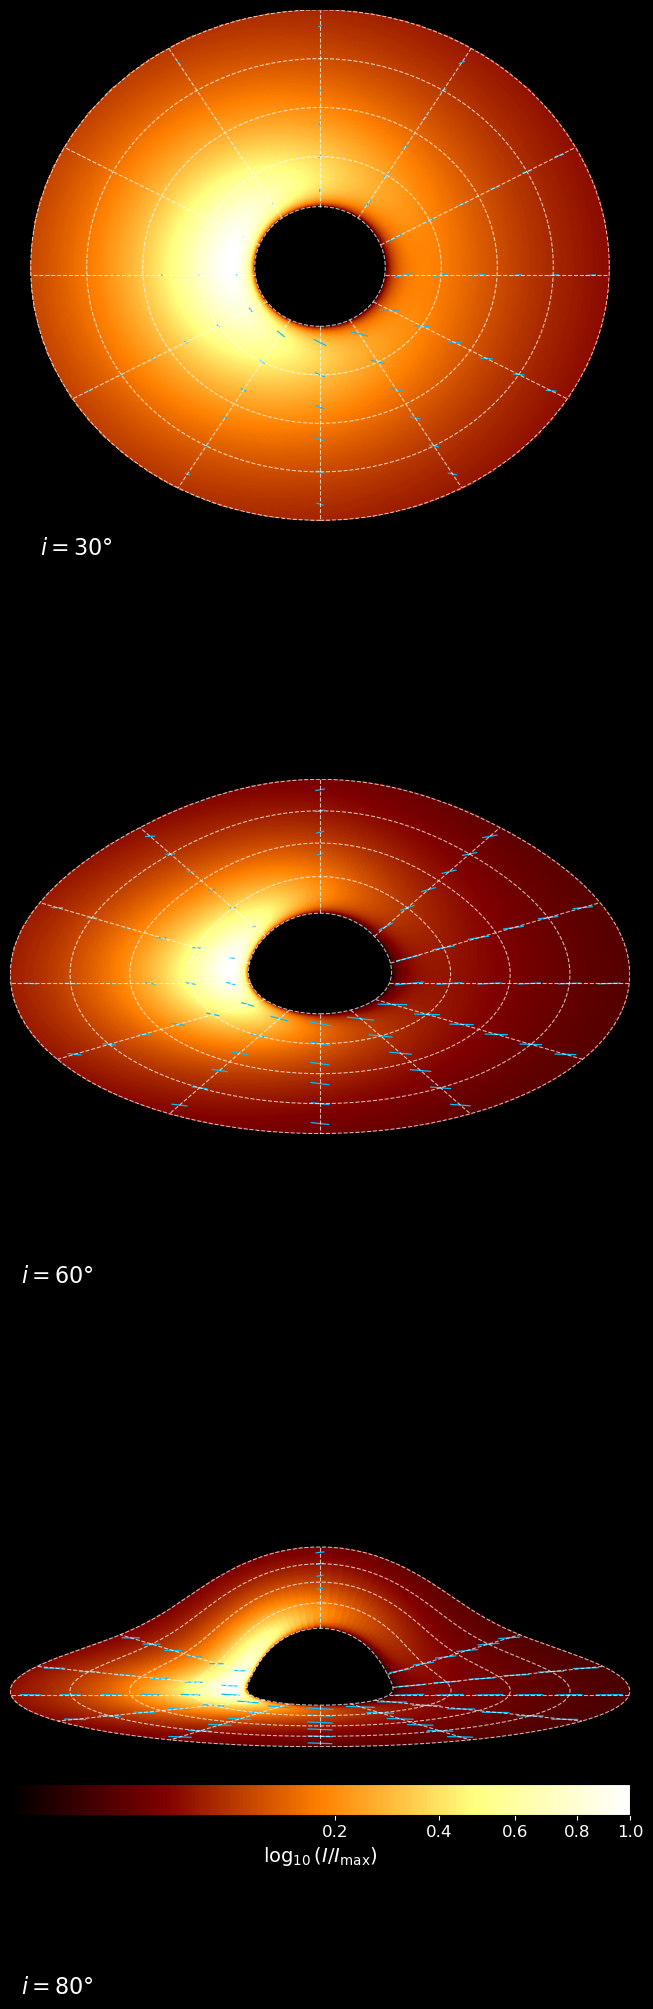

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Per-panel quiver scale factors
scale_factor_dic = {30: 80, 60: 40, 80: 20}

def plot_accretion_disk_image(ax, i_deg):
    i = np.deg2rad(i_deg)

    # Build (r, phi) grid
    r_min, r_max, n_r = 3, 15, 400
    phi_min, phi_max, n_phi = 0, 2*np.pi, 400
    r = np.linspace(r_min, r_max, n_r)
    phi = np.linspace(phi_min, phi_max, n_phi)
    r_grid, phi_grid = np.meshgrid(r, phi)
    u = 1.0 / r_grid

    # Physics computations
    cos_psi   = np.sin(i) * np.cos(phi_grid)
    sin_psi   = np.sqrt(1 - cos_psi**2)
    y         = 1 - cos_psi
    log_term  = np.log1p(-y/2)
    cos_alpha = 1 - y*(1-u)*(1 + (u**2*y**2)/112 
                          - (np.e*u*y/100)*(log_term + y/2))
    sin_alpha = np.sqrt(np.clip(1 - cos_alpha**2, 0, 1))

    beta  = np.sqrt(u/(2*(1-u)))
    gamma = np.sqrt((1-u)/(1 - 1.5*u))

    cos_zeta       = (sin_alpha/sin_psi)*np.cos(i)
    sin_zeta       = np.sqrt(1 - cos_zeta**2)
    cos_xi         = -(sin_alpha/sin_psi)*np.sin(i)*np.sin(phi_grid)
    delta          = 1/(gamma*(1 - beta*cos_xi))
    g              = delta*np.sqrt(1 - u)
    cos_zeta_prime = delta*cos_zeta

    t_u_fourth    = u**3 * (1 - np.sqrt(3*u))
    a_es          = 0.421 + 0.868*cos_zeta_prime
    I_map         = (g**4)*t_u_fourth*a_es

    pd            = 0.1171*(1 - cos_zeta_prime)/(1 + 3.5*cos_zeta_prime)

    a_tilde   = (1 - cos_alpha*cos_psi)/(cos_alpha - cos_psi)
    tan_chi_gr = (np.cos(i)*np.sin(phi_grid)) / (a_tilde*np.sin(i) + np.cos(phi_grid))
    chi_gr     = np.arctan(tan_chi_gr)
    tan_chi_sr = -beta*cos_alpha*cos_zeta/(sin_zeta**2 - beta*cos_xi)
    chi_sr     = np.arctan(tan_chi_sr)
    chi_tot    = chi_gr + chi_sr
    pa         = np.pi/2 + chi_tot

    # Raw sky coords & rotate 90° CCW
    b       = (r_grid/np.sqrt(1 - u))*sin_alpha
    cos_Phi = -np.cos(i)*np.cos(phi_grid)/sin_psi
    sin_Phi = -np.sin(phi_grid)/sin_psi
    X_raw   = b*cos_Phi
    Y_raw   = b*sin_Phi
    X = -Y_raw
    Y =  X_raw

    I_norm = I_map / np.max(I_map)
    # Plot intensity with pcolormesh
    im = ax.pcolormesh(
        X, Y, I_norm,
        cmap='afmhot',
        norm=PowerNorm(gamma=0.4,vmin=1e-3, vmax=1),
        shading='auto',
    )

    for r_c in np.arange(3, 16, 3):
        u_c = 1.0/r_c
        cos_psi_c = np.sin(i) * np.cos(phi)
        y_c = 1 - cos_psi_c
        log_term_c = np.log1p(-y_c / 2)
        cos_alpha_c = 1-y_c*(1-u_c)*(1+(u_c**2*y_c**2)/112-(np.e*u_c*y_c/100)*(log_term_c+y_c/2))
        sin_alpha_c = np.sqrt(1-cos_alpha_c**2)
        b_c = (r_c/np.sqrt(1-u_c)) * sin_alpha_c
        sin_psi_c = np.sqrt(1-cos_psi_c**2)
        cos_Phi_c = -np.cos(i)*np.cos(phi)/sin_psi_c
        sin_Phi_c = -np.sin(phi)/sin_psi_c
        ax.plot(-b_c * sin_Phi_c, b_c * cos_Phi_c, 'w--', linewidth=0.8, alpha=0.7)

    for phi_c in np.deg2rad(np.arange(0, 360, 30)):
        u_c = 1.0/r
        cos_psi_c = np.sin(i) * np.cos(phi_c)
        y_c = 1 - cos_psi_c
        log_term_c = np.log1p(-y_c / 2)
        cos_alpha_c = 1-y_c*(1-u_c)*(1+(u_c**2*y_c**2)/112-(np.e*u_c*y_c/100)*(log_term_c+y_c/2))
        sin_alpha_c = np.sqrt(1-cos_alpha_c**2)
        b_c = (r/np.sqrt(1-u_c)) * sin_alpha_c
        sin_psi_c = np.sqrt(1-cos_psi_c**2)
        cos_Phi_c = -np.cos(i)*np.cos(phi_c)/sin_psi_c
        sin_Phi_c = -np.sin(phi_c)/sin_psi_c
        ax.plot(-b_c * sin_Phi_c, b_c * cos_Phi_c, 'w--', linewidth=0.8, alpha=0.7)

    # # Quiver
    # skip_r = 35
    # skip_phi = 50
    # Xq = X[::skip_r, ::skip_phi]
    # Yq = Y[::skip_r, ::skip_phi]
    # pd_q = pd[::skip_r, ::skip_phi]
    # pa_q = pa[::skip_r, ::skip_phi]
    # scale = scale_factor_dic[i_deg]
    # Ur = -pd_q * np.sin(pa_q) * scale
    # Vr =  pd_q * np.cos(pa_q) * scale
    # ax.quiver(
    #     Xq, Yq, Ur, Vr,
    #     color='deepskyblue', headwidth=0, headlength=0,
    #     headaxislength=0, pivot='middle', scale_units='xy', scale=1,
    #     width=0.002, linewidths=0.3
    # )
    
# 1) define your desired radii and azimuths
    r_list   = np.array([4, 6, 8, 10, 12, 14])          # 6 radial rings
    phi_list = np.linspace(0, 2*np.pi, 12, endpoint=False)  # 36 φ values

    # 2) make a small mesh of those points
    Rq, Phiq = np.meshgrid(r_list, phi_list, indexing='xy')

    # 3) compute all the same physics at these Rq,Phiq:
    uq        = 1.0 / Rq
    cos_psiq  = np.sin(i) * np.cos(Phiq)
    sin_psiq  = np.sqrt(1 - cos_psiq**2)
    yq        = 1 - cos_psiq
    log_termq = np.log1p(-yq/2)
    cos_alphaq = 1 - yq*(1-uq)*(1+(uq**2 * yq**2)/112 - (np.e*uq*yq/100)*(log_termq + yq/2))
    sin_alphaq = np.sqrt(np.clip(1 - cos_alphaq**2,0,1))

    betaq  = np.sqrt(uq/(2*(1-uq)))
    gammaq = np.sqrt((1-uq)/(1 - 1.5*uq))

    cos_zetaq       = (sin_alphaq/sin_psiq)*np.cos(i)
    sin_zetaq       = np.sqrt(1 - cos_zetaq**2)
    cos_xiq         = -(sin_alphaq/sin_psiq)*np.sin(i)*np.sin(Phiq)
    deltaq          = 1/(gammaq*(1 - betaq*cos_xiq))
    gq              = deltaq*np.sqrt(1 - uq)
    cos_zetapq      = deltaq*cos_zetaq

    # local polarization
    pd_qmesh        = 0.1171*(1 - cos_zetapq)/(1 + 3.5*cos_zetapq)

    # polarization angle transport
    atan_grq = (np.cos(i)*np.sin(Phiq)) / ((1-cos_alphaq*cos_psiq)/(cos_alphaq-cos_psiq)*np.sin(i) + np.cos(Phiq))
    chi_grq  = np.arctan(atan_grq)
    atan_srq = -betaq*cos_alphaq*cos_zetaq/(sin_zetaq**2 - betaq*cos_xiq)
    chi_srq  = np.arctan(atan_srq)
    pa_qmesh = np.pi/2 + (chi_grq + chi_srq)

    # 4) compute the corresponding sky coords and rotate
    bq      = (Rq/np.sqrt(1-uq)) * sin_alphaq
    cos_Phiq_s = -np.cos(i)*np.cos(Phiq)/sin_psiq
    sin_Phiq_s = -np.sin(Phiq)/sin_psiq
    X_raw_q    = bq * cos_Phiq_s
    Y_raw_q    = bq * sin_Phiq_s
    Xq         = -Y_raw_q
    Yq         =  X_raw_q

    # 5) now build vector components
    scale = scale_factor_dic[i_deg]
    Uq = -pd_qmesh * np.sin(pa_qmesh) * scale
    Vq =  pd_qmesh * np.cos(pa_qmesh) * scale

    # 6) and plot
    ax.quiver(
        Xq, Yq, Uq, Vq,
        color='deepskyblue', headwidth=0, headlength=0, headaxislength=0,
        pivot='middle', scale_units='xy', scale=1,
        width=0.002, linewidths=0.3
    )

    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.text(-15, -15, f'$i={i_deg}°$', color='white', fontsize=16,
            bbox=dict(facecolor='black', alpha=0.6, pad=0.2))
    return im

# Main script
fig, axes = plt.subplots(3,1, figsize=(8,24), facecolor='black')
for ax, i_deg in zip(axes, [30,60,80]):
    im = plot_accretion_disk_image(ax, i_deg)
    ax.axis('off')

cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.04, pad=0.02)
cbar.set_label(r'$\log_{10}(I/I_{\max})$', color='white', fontsize=14)
cbar.ax.tick_params(colors='white', labelsize=12)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import warnings

# The transformation from disk to sky coordinates can create invalid values (NaNs)
# for certain phi/psi combinations (e.g., sin(psi)=0). We can ignore these warnings.
warnings.filterwarnings("ignore", category=RuntimeWarning)

scale_factor_dic = {30: 50, 60: 20, 80: 10}

def plot_accretion_disk_image(ax, i_deg):
    """
    Generates and plots the complete accretion disk image for a given inclination.

    This version uses tripcolor for robust plotting and has thinner polarization sticks.

    Args:
        ax: The matplotlib axes object to plot on.
        i_deg: The observer inclination angle in degrees.
    """
    i = np.deg2rad(i_deg)

    # Grid for the accretion disk polar coordinates
    r_min, r_max, n_r = 3, 15, 400
    phi_min, phi_max, n_phi = 0, 2 * np.pi, 400
    r = np.linspace(r_min, r_max, n_r)
    phi = np.linspace(phi_min, phi_max, n_phi)
    r_grid, phi_grid = np.meshgrid(r, phi)

    u = 1.0 / r_grid

    # --- Equations from the paper ---
    cos_psi = np.sin(i) * np.cos(phi_grid)
    sin_psi = np.sqrt(1 - cos_psi**2)
    y = 1 - cos_psi

    # Using np.log1p(x) is more accurate for small x than np.log(1+x)
    log_term = np.log1p(-y / 2)
    cos_alpha = 1 - y * (1 - u) * (1 + (u**2 * y**2) / 112 - (np.e * u * y / 100) * (log_term + y / 2))
    sin_alpha = np.sqrt(1 - cos_alpha**2)

    beta = np.sqrt(u / (2 * (1 - u)))
    gamma = np.sqrt((1 - u) / (1 - 3 * u / 2))

    cos_zeta = (sin_alpha / sin_psi) * np.cos(i)
    sin_zeta = np.sqrt(1 - cos_zeta**2)
    cos_xi = -(sin_alpha / sin_psi) * np.sin(i) * np.sin(phi_grid)

    delta = 1 / (gamma * (1 - beta * cos_xi))
    g = delta * np.sqrt(1 - u)

    cos_zeta_prime = delta * cos_zeta

    t_u_fourth = u**3 * (1 - np.sqrt(3 * u))
    a_es = 0.421 + 0.868 * cos_zeta_prime
    bolometric_intensity = (g**4) * t_u_fourth * a_es

    pd = 0.1171 * (1 - cos_zeta_prime) / (1 + 3.5 * cos_zeta_prime)

    a_tilde = (1 - cos_alpha * cos_psi) / (cos_alpha - cos_psi)
    tan_chi_gr = (np.cos(i) * np.sin(phi_grid)) / (a_tilde * np.sin(i) + np.cos(phi_grid))
    chi_gr = np.arctan(tan_chi_gr)

    tan_chi_sr = -beta * cos_alpha * cos_zeta / (sin_zeta**2 - beta * cos_xi)
    chi_sr = np.arctan(tan_chi_sr)

    chi_tot = chi_gr + chi_sr
    chi_0 = np.pi / 2
    pa = chi_0 + chi_tot

    # Sky coordinates
    b = (r_grid / np.sqrt(1 - u)) * sin_alpha
    cos_Phi = -np.cos(i) * np.cos(phi_grid) / sin_psi
    sin_Phi = -np.sin(phi_grid) / sin_psi
    Xr = b * cos_Phi
    Yr = b * sin_Phi

    X = -Yr
    Y = Xr

    # --- Plotting ---
    X_flat = X.flatten()
    Y_flat = Y.flatten()
    intensity_flat = bolometric_intensity.flatten()

    mask = np.isfinite(X_flat) & np.isfinite(Y_flat) & np.isfinite(intensity_flat)

    im = ax.tripcolor(
        X_flat[mask], Y_flat[mask], intensity_flat[mask],
        cmap='afmhot', shading='gouraud',
        norm=LogNorm(vmin=np.nanmax(bolometric_intensity)/100, vmax=np.nanmax(bolometric_intensity))
    )

    # --- Contours and Vectors ---
    for r_c in np.arange(3, 16, 3):
        u_c = 1.0/r_c
        cos_psi_c = np.sin(i) * np.cos(phi)
        y_c = 1 - cos_psi_c
        log_term_c = np.log1p(-y_c / 2)
        cos_alpha_c = 1-y_c*(1-u_c)*(1+(u_c**2*y_c**2)/112-(np.e*u_c*y_c/100)*(log_term_c+y_c/2))
        sin_alpha_c = np.sqrt(1-cos_alpha_c**2)
        b_c = (r_c/np.sqrt(1-u_c)) * sin_alpha_c
        sin_psi_c = np.sqrt(1-cos_psi_c**2)
        cos_Phi_c = -np.cos(i)*np.cos(phi)/sin_psi_c
        sin_Phi_c = -np.sin(phi)/sin_psi_c
        ax.plot(-b_c * sin_Phi_c, b_c * cos_Phi_c, 'w--', linewidth=0.8, alpha=0.7)

    for phi_c in np.deg2rad(np.arange(0, 360, 30)):
        u_c = 1.0/r
        cos_psi_c = np.sin(i) * np.cos(phi_c)
        y_c = 1 - cos_psi_c
        log_term_c = np.log1p(-y_c / 2)
        cos_alpha_c = 1-y_c*(1-u_c)*(1+(u_c**2*y_c**2)/112-(np.e*u_c*y_c/100)*(log_term_c+y_c/2))
        sin_alpha_c = np.sqrt(1-cos_alpha_c**2)
        b_c = (r/np.sqrt(1-u_c)) * sin_alpha_c
        sin_psi_c = np.sqrt(1-cos_psi_c**2)
        cos_Phi_c = -np.cos(i)*np.cos(phi_c)/sin_psi_c
        sin_Phi_c = -np.sin(phi_c)/sin_psi_c
        ax.plot(-b_c * sin_Phi_c, b_c * cos_Phi_c, 'w--', linewidth=0.8, alpha=0.7)

    skip = 50
    X_quiver = X[::skip, ::skip]
    Y_quiver = Y[::skip, ::skip]
    pd_quiver = pd[::skip, ::skip]
    pa_quiver = pa[::skip, ::skip]

    scale_factor = scale_factor_dic[i_deg]
    Ur = pd_quiver * np.cos(pa_quiver) * scale_factor
    Vr = pd_quiver * np.sin(pa_quiver) * scale_factor

    U = -Vr
    V = Ur

    # **FIX**: Added linewidth=0.5 to make the sticks thinner
    ax.quiver(X_quiver, Y_quiver, U, V, color='deepskyblue', headwidth=0,
              headlength=0, headaxislength=0, pivot='middle', scale_units='xy', scale=1,
              linewidths=0.5, width=0.002)

    # ax.plot([-2.5, 2.5], [-14.5, -14.5], 'w', linewidth=1.5)
    # ax.text(0, -15.5, '5%', color='w', ha='center', fontsize=12)

    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-16.5, 16.5)
    ax.set_ylim(-16.5, 16.5)
    ax.set_facecolor('black')
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.text(-15, -15, f'$i={i_deg}°$', color='white', fontsize=16,
            bbox=dict(facecolor='black', alpha=0.6, edgecolor='none', pad=0.2))

    return im

# --- Main script execution ---
fig, axes = plt.subplots(3, 1, figsize=(8, 24), facecolor='black')
fig.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0.05, wspace=0)

inclinations = [30, 60, 80]
for ax, i_deg in zip(axes, inclinations):
    im = plot_accretion_disk_image(ax, i_deg)
    ax.axis('off')

    # new, clean shared colorbar:
cbar = fig.colorbar(im, ax=axes, orientation='horizontal',
                    fraction=0.04, pad=0.02)
cbar.set_label(r'$\log_{10}(I/I_{\mathrm{max}})$',
                color='white', fontsize=14)
cbar.ax.tick_params(colors='white', labelsize=12)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Per‐panel quiver scale factors
scale_factor_dic = {30:50, 60:20, 80:10}

def plot_accretion_disk_image(ax, i_deg):
    i = np.deg2rad(i_deg)

    # Grid in (r,phi)
    r_min, r_max, n_r = 3, 15, 400
    phi_min, phi_max, n_phi = 0, 2*np.pi, 400
    r = np.linspace(r_min, r_max, n_r)
    phi = np.linspace(phi_min, phi_max, n_phi)
    r_grid, phi_grid = np.meshgrid(r, phi)
    u = 1.0 / r_grid

    # --- Physics from the paper ---
    cos_psi   = np.sin(i) * np.cos(phi_grid)
    sin_psi   = np.sqrt(1 - cos_psi**2)
    y         = 1 - cos_psi
    log_term  = np.log1p(-y/2)
    cos_alpha = 1 - y*(1-u)*(1 + (u**2*y**2)/112 - (np.e*u*y/100)*(log_term + y/2))
    sin_alpha = np.sqrt(np.clip(1 - cos_alpha**2, 0, 1))

    beta  = np.sqrt(u/(2*(1-u)))
    gamma = np.sqrt((1-u)/(1 - 1.5*u))

    cos_zeta       = (sin_alpha/sin_psi)*np.cos(i)
    sin_zeta       = np.sqrt(1 - cos_zeta**2)
    cos_xi         = -(sin_alpha/sin_psi)*np.sin(i)*np.sin(phi_grid)
    delta          = 1/(gamma*(1 - beta*cos_xi))
    g              = delta*np.sqrt(1 - u)
    cos_zeta_prime = delta*cos_zeta

    t_u_fourth    = u**3 * (1 - np.sqrt(3*u))
    a_es          = 0.421 + 0.868*cos_zeta_prime
    I_flat_phys   = (g**4)*t_u_fourth*a_es       # bolometric intensity array

    pd            = 0.1171*(1 - cos_zeta_prime)/(1 + 3.5*cos_zeta_prime)

    a_tilde   = (1 - cos_alpha*cos_psi)/(cos_alpha - cos_psi)
    tan_chi_gr = (np.cos(i)*np.sin(phi_grid)) / (a_tilde*np.sin(i) + np.cos(phi_grid))
    chi_gr     = np.arctan(tan_chi_gr)

    tan_chi_sr = -beta*cos_alpha*cos_zeta/(sin_zeta**2 - beta*cos_xi)
    chi_sr     = np.arctan(tan_chi_sr)

    chi_tot = chi_gr + chi_sr
    chi_0    = np.pi/2
    pa       = chi_0 + chi_tot  # polarization angle

    # --- RAW sky coordinates (no rotation yet) ---
    b       = (r_grid/np.sqrt(1 - u))*sin_alpha
    cos_Phi = -np.cos(i)*np.cos(phi_grid)/sin_psi
    sin_Phi = -np.sin(phi_grid)/sin_psi
    X_raw   = b*cos_Phi
    Y_raw   = b*sin_Phi

    # --- single 90° CCW rotation applied to all layers ---
    X = -Y_raw
    Y =  X_raw

    # --- Intensity plot ---
    I_flat = I_flat_phys.flatten()
    mask   = np.isfinite(X.flatten()) & np.isfinite(Y.flatten()) & np.isfinite(I_flat)
    im = ax.tripcolor(
        X.flatten()[mask], Y.flatten()[mask], I_flat[mask],
        cmap='afmhot', shading='gouraud',
        norm=LogNorm(vmin=I_flat.max()/100, vmax=I_flat.max())
    )

    # --- Contour rings (raw→rotated) ---
    for r_c in np.arange(3,16,3):
        u_c       = 1.0/r_c
        cos_psi_c = np.sin(i)*np.cos(phi)
        sin_psi_c = np.sqrt(1 - cos_psi_c**2)
        y_c       = 1 - cos_psi_c
        log_c     = np.log1p(-y_c/2)
        cos_alpha_c = 1 - y_c*(1-u_c)*(1 + (u_c**2*y_c**2)/112 - (np.e*u_c*y_c/100)*(log_c + y_c/2))
        sin_alpha_c = np.sqrt(np.clip(1-cos_alpha_c**2,0,1))
        b_c         = (r_c/np.sqrt(1-u_c))*sin_alpha_c
        cos_Phi_c   = -np.cos(i)*np.cos(phi)/sin_psi_c
        sin_Phi_c   = -np.sin(phi)/sin_psi_c
        Xc_raw      = b_c*cos_Phi_c
        Yc_raw      = b_c*sin_Phi_c
        Xc = -Yc_raw
        Yc =  Xc_raw
        ax.plot(Xc, Yc, 'w--', linewidth=0.8, alpha=0.7)

    # --- Contour spokes (φ=const) ---
    for phi_c in np.deg2rad(np.arange(0,360,30)):
        u_c         = 1.0/r
        cos_psi_r   = np.sin(i)*np.cos(phi_c)
        sin_psi_r   = np.sqrt(1 - cos_psi_r**2)
        y_r         = 1 - cos_psi_r
        log_r       = np.log1p(-y_r/2)
        cos_alpha_r = 1 - y_r*(1-u_c)*(1+(u_c**2*y_r**2)/112 - (np.e*u_c*y_r/100)*(log_r + y_r/2))
        sin_alpha_r = np.sqrt(np.clip(1-cos_alpha_r**2,0,1))
        b_r         = (r/np.sqrt(1-u_c))*sin_alpha_r
        cos_Phi_r   = -np.cos(i)*np.cos(phi_c)/sin_psi_r
        sin_Phi_r   = -np.sin(phi_c)/sin_psi_r
        Xr_raw      = b_r*cos_Phi_r
        Yr_raw      = b_r*sin_Phi_r
        Xr = -Yr_raw
        Yr =  Xr_raw
        ax.plot(Xr, Yr, 'w--', linewidth=0.8, alpha=0.7)

    # --- Quiver (polarization sticks) ---
    skip = 50
    Xq = X[::skip, ::skip]
    Yq = Y[::skip, ::skip]
    pd_q = pd[::skip, ::skip]
    pa_q = pa[::skip, ::skip]

    scale = scale_factor_dic[i_deg]
    Ur = - (pd_q * np.sin(pa_q) * scale)
    Vr =   (pd_q * np.cos(pa_q) * scale)

    ax.quiver(
        Xq, Yq, Ur, Vr,
        color='deepskyblue',
        headwidth=0, headlength=0, headaxislength=0,
        pivot='middle', scale_units='xy', scale=1,
        width=0.002, linewidths=0.3
    )

    ax.set_aspect('equal', 'box')
    ax.axis('off')
    ax.text(-15,-15,f'$i={i_deg}°$',color='white',fontsize=16,
            bbox=dict(facecolor='black',alpha=0.6,pad=0.2))
    return im

# --- Main plotting ---
fig, axes = plt.subplots(3,1, figsize=(8,24), facecolor='black')
for ax, i_deg in zip(axes, [30,60,80]):
    im = plot_accretion_disk_image(ax, i_deg)

# Shared colorbar
cbar = fig.colorbar(im, ax=axes, orientation='horizontal',
                    fraction=0.04, pad=0.02)
cbar.set_label(r'$\log_{10}(I/I_{\max})$', color='white', fontsize=14)
cbar.ax.tick_params(colors='white', labelsize=12)

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Per-panel quiver scale factors
scale_factor_dic = {30:50, 60:20, 80:10}

def plot_accretion_disk_image(ax, i_deg):
    i = np.deg2rad(i_deg)

    # --- Build (r, phi) grid ---
    r_min, r_max, n_r = 3, 15, 400
    phi_min, phi_max, n_phi = 0, 2*np.pi, 400
    r = np.linspace(r_min, r_max, n_r)
    phi = np.linspace(phi_min, phi_max, n_phi)
    r_grid, phi_grid = np.meshgrid(r, phi)
    u = 1.0 / r_grid

    # --- Physics from the paper ---
    cos_psi   = np.sin(i) * np.cos(phi_grid)
    sin_psi   = np.sqrt(1 - cos_psi**2)
    y         = 1 - cos_psi
    log_term  = np.log1p(-y/2)
    cos_alpha = 1 - y*(1-u)*(1 + (u**2*y**2)/112 
                          - (np.e*u*y/100)*(log_term + y/2))
    sin_alpha = np.sqrt(np.clip(1 - cos_alpha**2,0,1))

    beta  = np.sqrt(u/(2*(1-u)))
    gamma = np.sqrt((1-u)/(1 - 1.5*u))

    cos_zeta       = (sin_alpha/sin_psi)*np.cos(i)
    sin_zeta       = np.sqrt(1 - cos_zeta**2)
    cos_xi         = -(sin_alpha/sin_psi)*np.sin(i)*np.sin(phi_grid)
    delta          = 1/(gamma*(1 - beta*cos_xi))
    g              = delta*np.sqrt(1 - u)
    cos_zeta_prime = delta*cos_zeta

    t_u_fourth    = u**3 * (1 - np.sqrt(3*u))
    a_es          = 0.421 + 0.868*cos_zeta_prime
    I_map         = (g**4)*t_u_fourth*a_es

    pd            = 0.1171*(1 - cos_zeta_prime)/(1 + 3.5*cos_zeta_prime)

    a_tilde   = (1 - cos_alpha*cos_psi)/(cos_alpha - cos_psi)
    tan_chi_gr = (np.cos(i)*np.sin(phi_grid)) / (a_tilde*np.sin(i) + np.cos(phi_grid))
    chi_gr     = np.arctan(tan_chi_gr)
    tan_chi_sr = -beta*cos_alpha*cos_zeta/(sin_zeta**2 - beta*cos_xi)
    chi_sr     = np.arctan(tan_chi_sr)
    chi_tot    = chi_gr + chi_sr
    pa         = np.pi/2 + chi_tot

    # --- RAW sky coords, then single 90° CCW rotation ---
    b       = (r_grid/np.sqrt(1 - u))*sin_alpha
    cos_Phi = -np.cos(i)*np.cos(phi_grid)/sin_psi
    sin_Phi = -np.sin(phi_grid)/sin_psi
    X_raw   = b*cos_Phi
    Y_raw   = b*sin_Phi
    X = -Y_raw
    Y =  X_raw

    # --- Plot intensity ---
    I_flat = I_map.flatten()
    mask   = np.isfinite(X.flatten()) & np.isfinite(Y.flatten()) & np.isfinite(I_flat)
    im = ax.tripcolor(
        X.flatten()[mask], Y.flatten()[mask], I_flat[mask],
        cmap='afmhot', shading='gouraud',
        norm=LogNorm(vmin=I_flat.max()/100, vmax=I_flat.max())
    )


    # --- 1D contours: rings at fixed r_c ---
   # rings at fixed r_c:
    for r_c in np.arange(3, 16, 3):
        # find nearest column index for this radius
        idx = np.abs(r - r_c).argmin()
        Xc = X[:, idx]
        Yc = Y[:, idx]
        # mask any bad points
        good = np.isfinite(Xc) & np.isfinite(Yc)
        ax.plot(Xc[good], Yc[good], 'w--', linewidth=0.8, alpha=0.7)

    # spokes at fixed phi_c:
    for phi_c in np.deg2rad(np.arange(0, 360, 30)):
        # find nearest row index for this azimuth
        jdx = np.abs(phi - phi_c).argmin()
        Xr = X[jdx, :]
        Yr = Y[jdx, :]
        good = np.isfinite(Xr) & np.isfinite(Yr)
        ax.plot(Xr[good], Yr[good], 'w--', linewidth=0.8, alpha=0.7)


    # --- quiver (polarization sticks) ---
    skip = 50
    Xq, Yq = X[::skip,::skip], Y[::skip,::skip]
    pd_q, pa_q = pd[::skip,::skip], pa[::skip,::skip]
    scale = scale_factor_dic[i_deg]
    Ur = -pd_q * np.sin(pa_q) * scale
    Vr =  pd_q * np.cos(pa_q) * scale

    ax.quiver(
        Xq, Yq, Ur, Vr,
        color='deepskyblue',
        headwidth=0, headlength=0, headaxislength=0,
        pivot='middle', scale_units='xy', scale=1,
        width=0.002, linewidths=0.3
    )

    ax.set_aspect('equal','box')
    ax.axis('off')
    ax.text(-15,-15,f'$i={i_deg}°$',color='white',fontsize=16,
            bbox=dict(facecolor='black',alpha=0.6,pad=0.2))

    return im

# --- Main plotting ---
fig, axes = plt.subplots(3,1, figsize=(8,24), facecolor='black')
for ax, i_deg in zip(axes,[30,60,80]):
    im = plot_accretion_disk_image(ax,i_deg)

cbar = fig.colorbar(im, ax=axes, orientation='horizontal', fraction=0.04, pad=0.02)
cbar.set_label(r'$\log_{10}(I/I_{\max})$',color='white',fontsize=14)
cbar.ax.tick_params(colors='white',labelsize=12)

plt.show()
